In [1]:
import os
import sep
import csv
import glob
from mpdaf.obj import WCS
#import aplpy
import fitsio
import pandas as pd
import numpy as np
import warnings


import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib.image as mpimg
from matplotlib.patches import Ellipse
from matplotlib.ticker import PercentFormatter

from PyAstronomy import pyasl
from scipy.interpolate import interp1d
from scipy.integrate import trapezoid
from scipy.stats import ks_2samp
from scipy.stats import norm
from photutils.detection import DAOStarFinder
from photutils.centroids import centroid_2dg

from astropy.utils.exceptions import AstropyWarning
from astropy.coordinates import SkyCoord
from astropy.stats import sigma_clipped_stats
from astropy.stats import mad_std
import astropy.units as u
import astropy.constants as conts
import astropy.coordinates as coord
from astropy.table import Table
from astropy.io import fits
import astropy.wcs as AsWCS
#from astropy import wcs
import scipy.integrate
from astropy.cosmology import FlatLambdaCDM
import requests
from PIL import Image
from io import BytesIO

# import hostphot

# from hostphot._constants import workdir
# from hostphot._constants import font_family
# from hostphot.cutouts import download_images
# from hostphot.cutouts import check_existing_images
# from hostphot.coadd import coadd_images
# from hostphot.image_masking import create_mask
# from hostphot.image_cleaning import remove_nan
# from hostphot.utils import plot_fits, get_survey_filters
# from hostphot.utils import suppress_stdout
# from hostphot.sed_plotting import plot_sed
# import hostphot.local_photometry as lp
# import hostphot.global_photometry as gp


Total SNe Ia in DEBASS_Finished 'DEBASS_finished': 365

Targets in both PS1 & SDSS 'In_Both': 176

Targets in ONLY PS1  'Only_PS1': 147

Neither in PS1 nor SDSS 'NotinPS1': 23 --DES

Hostless: 73

SNe that are not type Ia and unavailable : 29

In [5]:
np.sqrt(572)

23.916521486202797

In [9]:
import hostphot

ImportError: cannot import name 'update_default_config' from 'astropy.config.configuration' (/Users/dingyuancao/opt/anaconda3/envs/Hostphot/lib/python3.11/site-packages/astropy/config/configuration.py)

In [7]:
571%83

73

In [3]:
Only_PS1 = pd.read_csv('Only_PS1.csv')
In_Both = pd.read_csv('In_Both.csv')
DE_DES = pd.read_csv('DES.csv')
DEBASS_Host = pd.read_csv('DEBASS_Host.csv')

all_names = DEBASS_Host['snid']

PS1_names = list(Only_PS1['snid'])
PS1_z = list(Only_PS1['Redshift'])

both_names = list(In_Both['snid'])
both_z = list(In_Both['Redshift'])

DES_names = list(DE_DES['snid'])
DES_z = list(DE_DES['Redshift'])

redshifts = list(DEBASS_Host['Redshift'])
# ras = list(DEBASS_Host['SN_RA'])
# decs = list(DEBASS_Host['SN_DEC'])
# host_ras = list(DEBASS_Host['HOST_RA'])
# host_decs = list(DEBASS_Host['HOST_DEC'])


# DEBASS_mass = DE_allM['Mass']
# FN_mass = FN_mass_reorder['mass']

# DEBASS_UR = Host_color_Vega['u-r Color']
# FN_UR = FN_color['u-r Color']

# allDEBASS = pd.read_csv('DEBASS Sample - Updated.csv')
# DEBASS_finished = pd.read_csv('DEBASS_Finished_Yes.csv')
# NotinPS1 = pd.read_csv('NotinPS1.csv') 

# Filter targets

In [835]:
allDEBASS = pd.read_csv('DEBASS Sample - Updated.csv')
DEBASS_finished = pd.read_csv('DEBASS_Finished_Yes.csv')
NotinPS1 = pd.read_csv('NotinPS1.csv') 
In_Both = pd.read_csv('In_Both.csv')
Only_PS1 = pd.read_csv('Only_PS1.csv')
DEBASS_Host = pd.read_csv('DEBASS_Host.csv')
# filtered_data = allDEBASS[allDEBASS['Following?'].isin(['FINISHED', 'YES'])]
# filtered_data.to_csv('DEBASS_Finished_Yes.csv', index=False)   
# filtered_data = pd.read_csv('DEBASS_Finished_Yes.csv')
# filtered_data.to_csv('DEBASS_Finished_Yes.csv', index=True)

# CrossIDdata = filtered_data[['snid','RA', 'DEC']]
# CrossIDdata.to_csv('CrossID.txt', sep='\t', index=False)

In [127]:
Skyserver_CrossID = pd.read_csv('Skyserver_CrossID7_25_2024 6_08_02 AM.csv')

In_SDSS = DEBASS_finished[DEBASS_finished['snid'].isin(Skyserver_CrossID['name'])]

(In_SDSS.drop(columns=['Unnamed: 0'])).to_csv('In_SDSS.csv', index=False)

In_SDSS = pd.read_csv('In_SDSS.csv')

In [39]:
def getimages(name,ra,dec,filters="grizy"):
    
    """Query ps1filenames.py service to get a list of images
    
    ra, dec = position in degrees
    size = image size in pixels (0.25 arcsec/pixel)
    filters = string with filters to include
    Returns a table with the results
    """
    service = "https://ps1images.stsci.edu/cgi-bin/ps1filenames.py"
    url = f"{service}?ra={ra}&dec={dec}&filters={filters}"
    table = Table.read(url, format='ascii')
    if len(table) != 5:
        print(name, 'is not applicable.')
    else:
        print(name, 'is avaliable in PS1')
    # return table

allnames = list(DEBASS_finished['snid'])
allredshifts = list(DEBASS_finished['Redshift'])
allhost_ras = list(DEBASS_finished['RA'])
allhost_decs = list(DEBASS_finished['DEC'])

IN_PS1 = []
for n in range(0,len(allnames)):
    try:
        getimages(allnames[n],allhost_ras[n],allhost_decs[n],filters="grizy")
        IN_PS1.append(allnames[n])
    except:
        print('Target not in PS1')
        continue

CS1 is avaliable in PS1
CS2 is avaliable in PS1
CS3 is avaliable in PS1
CS4 is avaliable in PS1
CS5 is avaliable in PS1
Shapley_Skymapper is not applicable.
2021dha is avaliable in PS1
2021dev is avaliable in PS1
2021ckc is avaliable in PS1
2021clw is not applicable.
2021cyn is avaliable in PS1
2021dch is avaliable in PS1
2021dnl is avaliable in PS1
2021dov is avaliable in PS1
2021dep is avaliable in PS1
2021ddh is avaliable in PS1
2021dcu is avaliable in PS1
2021dlb is avaliable in PS1
2021drc is avaliable in PS1
2021gmk is not applicable.
2021hfq is not applicable.
2021hem is avaliable in PS1
2021hjc is avaliable in PS1
2021hjb is avaliable in PS1
2021hiz is avaliable in PS1
2021grd is avaliable in PS1
2021ghc is avaliable in PS1
2021fna is avaliable in PS1
2021gkb is avaliable in PS1
2021fxy is avaliable in PS1
2021foh is avaliable in PS1
2021fqb is avaliable in PS1
2021gwa is avaliable in PS1
2021gez is avaliable in PS1
2021fof is avaliable in PS1
2021gqc is avaliable in PS1
2021gw

In [4]:
NotinPS1 = ['2021clw','2021gmk','2021hfq','2021hvo','2021zgf', '2021aaga','2021aafz', '2021abmp', '2021aefx',
                 '2021aglk','2022qpp','2022rnt','2022trz','2022wwt','2022acwj','2023E','2023azu','2023cvf','2023ctf',
                 '2023cum','2023cul','2023dtm','2023dwc','2023elb','2023eob','2023eod','2023epe','2023fdj','2023fpa',
                 '2023hnl','2023inb','2023kin','2023ons','2023pwl','2023qov','2023teb','2023snj','2023tfc','2023tfg',
                 '2023tfj','2023vcr','2023zce','2023aajf','2023aaqu','2023abjs','2024hl','2024bha','2024mze','2024nwu']
len(NotinPS1)

49

In [5]:
# NotinPS1 = (DEBASS_finished[DEBASS_finished['snid'].isin(NotinPS1)])
# # (NotinPS1.drop(columns=['Unnamed: 0'])).to_csv('NotinPS1.csv', index=False)
# NotinPS1.to_csv('NotinPS1.csv')

In [128]:
In_PS1 = (DEBASS_finished[~DEBASS_finished['snid'].isin(NotinPS1)])
(In_PS1.drop(columns=['Unnamed: 0'])).to_csv('In_PS1.csv', index=False)
In_PS1 = pd.read_csv('In_PS1.csv')

### In Both

In [7]:
# both_PS1_SDSS = In_SDSS[In_SDSS['snid'].isin(In_PS1['snid'])]
# (both_PS1_SDSS.drop(columns=['Unnamed: 0'])).to_csv('In_Both.csv', index=False)
In_Both = pd.read_csv('In_Both.csv')

In [8]:
# Neither = DEBASS_finished[~DEBASS_finished['snid'].isin(In_PS1['snid']) &
#                           ~DEBASS_finished['snid'].isin(In_SDSS['snid'])]
# Only_PS1 = In_PS1[~In_PS1['snid'].isin(In_Both['snid'])]
# Only_PS1.to_csv('Only_PS1.csv', index=False)
Only_PS1 = pd.read_csv('Only_PS1.csv')

### Spec Type

In [6]:
def getimages(name,spec_type):
    if spec_type != 'spec ia':
        print(name, 'is', spec_type, ', not SN Ia')
    else:
        print(name, 'is SN Ia')
    # return table

allnames = list(In_Both['snid'])
allredshifts = list(In_Both['Redshift'])
allhost_ras = list(In_Both['RA'])
allhost_decs = list(In_Both['DEC'])
alltypes = list(In_Both['TNS class'])

SNeIa = []
otherSN = []
for n in range(0,len(allnames)):
    if alltypes[n] in ['SN IIn','ib','ib/c','cx like','bg like','II','AGN','91bg','Ic']:
        print(allnames[n], 'is', alltypes[n])
        otherSN.append([allnames[n],alltypes[n]])
len(otherSN)

0

# Host RA & DEC

## Use 2021grd as an example

In [ ]:
data = fitsio.read('cutout_rings.v3.skycell.1086.025.stk.r.unconv.fits')
header = fitsio.read_header('cutout_rings.v3.skycell.1086.025.stk.r.unconv.fits')
wcs = WCS(header)

# Supernova RA and Dec
sn_ra = 129.426957433333   # in degrees
sn_dec = -11.1879023       # in degrees
# Convert to pixel coordinates
supernova_pixel = wcs.world_to_pixel(SkyCoord(ra=sn_ra*u.degree, dec=sn_dec*u.degree))

In [123]:
# Use SEP to extract the best-fitted host galaxy
a = []
b = []
theta = []
host_ras = []
host_decs = []
def getHost(data):
    coefficient = 50
    acc = 1
    exp = 1
    objects = sep.extract(data, 1100, err=1,minarea=coefficient)
    objLen = objects.shape[0]
    while objLen != 1:
        if (objLen > 1):
            if (len(str(int(coefficient/(10**exp)))) == acc):
                coefficient += 1 * 10**exp
            else: 
                exp += 1
                coefficient = 2 * 10**exp
            objects = sep.extract(data, 1100, err=1,minarea=coefficient)
            objLen = objects.shape[0] 
        else:
            coefficient -= 1 * 10**exp
            acc += 1
            exp -= 1
            coefficient += 1 * 10**exp
            objects = sep.extract(data, 1100, err=1,minarea=coefficient)
            objLen = objects.shape[0] 
                        
    #print(objLen)
    objects = pd.DataFrame(objects)
    # a.append(objects['a'][0])
    # b.append(objects['b'][0])
    # theta.append(objects['theta'][0])

    # host_ras.append(objects['x'][0])
    # host_decs.append(objects['y'][0])
    return objects

In [102]:
print(f"Galaxy RA: {object['x'][0]}, Galaxy Dec: {object['y'][0]}, in pixel")

Galaxy RA: 120.71359792018777, Galaxy Dec: 115.70775044327789, in pixel


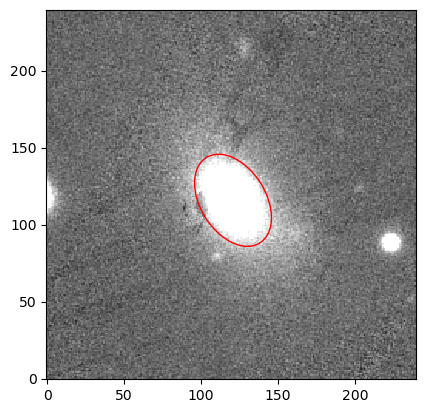

In [80]:
# plot background-subtracted image
fig, ax = plt.subplots()
m, s = np.mean(data), np.std(data)
im = ax.imshow(data, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

# plot an ellipse for each object
for i in range(len(object)):
    e = Ellipse(xy=(object['x'][i], object['y'][i]),
                width=6*object['a'][i],
                height=6*object['b'][i],
                angle=object['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)

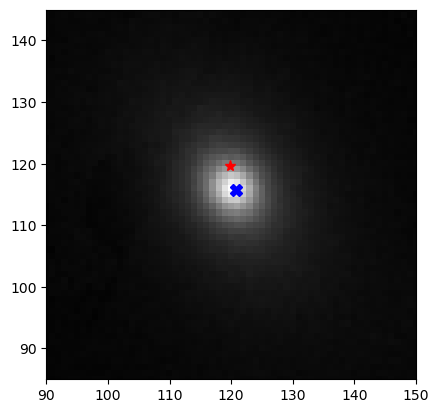

In [101]:
plt.imshow(data, origin='lower', cmap='gray')
plt.plot(supernova_pixel[0], supernova_pixel[1], color='red', marker='*',markersize=8)
plt.plot(object['x'], object['y'], color='blue', marker='X',markersize=8)
plt.xlim(90,150)
plt.ylim(85,145)
plt.show()

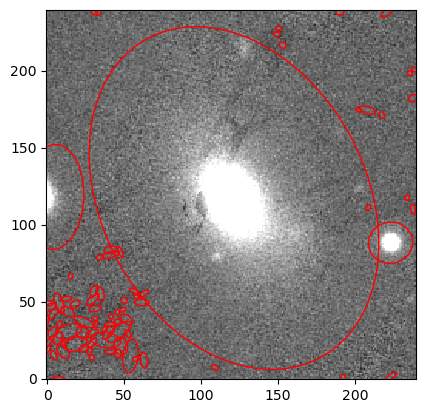

In [62]:
# plot background-subtracted image
fig, ax = plt.subplots()
m, s = np.mean(data), np.std(data)
im = ax.imshow(data, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

# plot an ellipse for each object
for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)

In [ ]:
for n in range(0, len(csv_files)):
    data = fitsio.read(csv_files[n])
    obj = getObj(data)

    a_list.append(obj['a'][0])
    b_list.append(obj['b'][0])
    theta_list.append(obj['theta'][0])

In [51]:
# Estimate the background noise level
mean, median, std = sigma_clipped_stats(data, sigma=3.0)
bkg_sigma = mad_std(data)

# Initialize the star finder
daofind = DAOStarFinder(fwhm=3.0, threshold=5.*bkg_sigma)

# Detect sources
sources = daofind(data - median)

# Convert to table and sort by flux
sources = Table(sources)
sources.sort('flux', reverse=True)

# The brightest source is likely the galaxy center
galaxy_pixel_x = sources['xcentroid'][0]
galaxy_pixel_y = sources['ycentroid'][0]

# Refine the centroid position
galaxy_center = centroid_2dg(data[int(galaxy_pixel_y)-10:int(galaxy_pixel_y)+10, int(galaxy_pixel_x)-10:int(galaxy_pixel_x)+10])
refined_galaxy_pixel_x = galaxy_pixel_x + galaxy_center[0] - 10
refined_galaxy_pixel_y = galaxy_pixel_y + galaxy_center[1] - 10

# Convert the pixel coordinates to world coordinates (RA, Dec)
galaxy_ra_dec = wcs.pixel_to_world(refined_galaxy_pixel_x, refined_galaxy_pixel_y)

# Access the RA and Dec values
galaxy_ra = galaxy_ra_dec.ra.degree
galaxy_dec = galaxy_ra_dec.dec.degree

print(f"Galaxy RA: {galaxy_pixel_x}, Galaxy Dec: {galaxy_pixel_y}")
print(f"SN RA: {supernova_pixel[0]}, SN Dec: {supernova_pixel[1]}")

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Galaxy RA: 223.37633977527665, Galaxy Dec: 88.33174224775718
SN RA: 119.7831782020445, SN Dec: 119.66824036612161


## Download and coad all image cut-outs

In [109]:
coadd_dict = {'PS1':'riz','SDSS':'riz'} 
surveys = ['PS1','SDSS']

both_names = list(In_Both['snid'])
PS1names = list(Only_PS1['snid'])

def download_coad_both(name, ra,dec):
    for survey, coadd_filters in coadd_dict.items():
        download_images(name,ra,dec, survey=survey, overwrite=True)
        coadd_images(name, filters=coadd_filters, survey=survey)

def download_coad_PS1(name, ra,dec):
    download_images(name,ra,dec, survey='PS1', overwrite=True)
    coadd_images(name, filters='riz', survey='PS1')

def download_coad_DES(name, ra,dec):
    download_images(name,ra,dec, survey='DES', overwrite=True)
    coadd_images(name, filters='riz', survey='DES')

# PS1redshifts = list(Only_PS1['Redshift'])
# PS1ras = list(Only_PS1['RA'])
# PS1decs = list(Only_PS1['DEC'])

# both_redshifts = list(In_Both['Redshift'])
# both_ras = list(In_Both['RA'])
# both_decs = list(In_Both['DEC'])



In [ ]:
#n = 312 # ignore CS1-CS6 & Skymapper
# names = list(DEBASS_finished['snid'])
# redshifts = list(DEBASS_finished['Redshift'])
# ras = list(DEBASS_finished['RA'])
# decs = list(DEBASS_finished['DEC'])

n = 41
while n < len(NotinPS1['snid']):
    download_coad_DES(NotinPS1['snid'][n],NotinPS1['RA'][n],NotinPS1['DEC'][n])
    n += 1


# while n < len(names)+1:
#     if names[n] in PS1names:
#         download_coad_PS1(names[n],ras[n],decs[n])
#         n += 1
#     elif names[n] in both_names:
#         download_coad_both(names[n],ras[n],decs[n])
#         n += 1
#     else:
#         n += 1

## Select host galaxy and Extract the RA & DEC

In [1208]:
# Define getHost function
# min(pixel_brightness) <= threshold <= max(pixel_brightness)
# 1 <= minarea <= sizeof(data) 
# object = sep.extract(data, threshold, minarea)
def getHost(data, numOfObj):
    coefficient = 50
    acc = 1
    exp = 1
    objects = sep.extract(data, 1100, err=1.5,minarea=coefficient)
    objLen = objects.shape[0]
    while objLen != numOfObj:
        if (objLen > numOfObj):
            if (len(str(int(coefficient/(10**exp)))) == acc):
                coefficient += 1 * 10**exp
            else: 
                exp += 1
                coefficient = 2 * 10**exp
            objects = sep.extract(data, 1100, err=1.5,minarea=coefficient)
            objLen = objects.shape[0] 
        else:
            coefficient -= 1 * 10**exp
            acc += 1
            exp -= 1
            coefficient += 1 * 10**exp
            objects = sep.extract(data, 1100, err=1.5,minarea=coefficient)
            objLen = objects.shape[0] 
                        
    print(objLen)
    objects = pd.DataFrame(objects)
    # a.append(objects['a'][0])
    # b.append(objects['b'][0])
    # theta.append(objects['theta'][0])

    # host_ras.append(objects['x'][0])
    # host_decs.append(objects['y'][0])
    return objects

In [8]:
# Extract all 'PS1_riz' fits files in PS1 and SDSS
riz_fits = 'PS1_riz.fits'
DEBASS_finished = pd.read_csv('DEBASS_Finished_Yes.csv')
names = DEBASS_finished['snid']
fits_files = []
name_list = []
for name in names:
    if name in PS1_names or name in both_names:
        survey_files = os.listdir(f'images/{name}')
        name_list.append(name)
        for file in survey_files:
            if file == riz_fits:
                fits_files.append(f'images/{name}/' + file)

In [144]:
# Extract all 'DES_riz' fits files in DES
riz_fits = 'DES_riz.fits'
DES = pd.read_csv('DES.csv')
DESnames = DES['snid']
DESfits_files = []
for name in DESnames:
    survey_files = os.listdir(f'images/{name}')
    for file in survey_files:
        if file == riz_fits:
            DESfits_files.append(f'images/{name}/' + file)

In [ ]:
# Use getHost to extract host galaxy RA and Dec
DEShost_ra_dec6 = []
n = 22
while n < len(DESfits_files):
    data = fitsio.read(DESfits_files[n])
    obj = getHost(data)
    # host_ras.append(obj['x'][0])
    # host_decs.append(obj['y'][0])
    DEShost_ra_dec6.append([DESnames[n], obj['x'][0],obj['y'][0]])
    #print(len(obj))
    n+=1
    # a = []
    # b = []
    # theta = []
    # host_ras = []
    # host_decs = []
    # a_list.append(obj['a'][0])
    # b_list.append(obj['b'][0])
    # theta_list.append(obj['theta'][0])

In [274]:
#DEShost_ra_dec1 = DEShost_ra_dec
DEShost_ra_dec = DEShost_ra_dec1 + DEShost_ra_dec2 + DEShost_ra_dec3 + DEShost_ra_dec4 + DEShost_ra_dec5 + DEShost_ra_dec6
# 0+1 + 3+4 + 6+7+8 + 10+11+12+ 16+17+18+19+20

In [278]:
#host_ra_dec = pd.read_csv('DEBASShost_ra_dec-pixel.csv')
# DEShost_ra_dec = pd.DataFrame(DEShost_ra_dec, columns=['snid','ra','dec'])
# DEShost_ra_dec.to_csv('DEShost_ra_dec-pixel.csv', index=True)
DEShost_ra_dec_pixel = pd.read_csv('DEShost_ra_dec-pixel.csv')
# host_ra_dec = host_ra_dec1 + host_ra_dec2 + host_ra_dec3 + host_ra_dec4
# host_ra_dec = pd.DataFrame(host_ra_dec, columns=['snid','ra','dec'])
# host_ra_dec.to_csv('host_ra_dec.csv', index=True)

In [214]:
def extract_objects(data, bkg, host_ra, host_dec, threshold, img_wcs, dist_thresh):
    """Extracts objects and their ellipse parameters. The function :func:`sep.extract()`
    is used.

    If there is no detected object within a distance of ``dist_thresh`` from the galaxy
    coordinates, it means that the galaxy was not correctly identified.

    Parameters
    ----------
    data: ndarray
        Image data.
    bkg: 2D array
        Background level of the image.
    host_ra: float
        Host-galaxy Right ascension of the galaxy in degrees.
    host_dec: float
        Host-galaxy Declination of the galaxy in degrees.
    threshold: float
        Source with flux above ``threshold*bkg_rms`` are extracted.
        See :func:`sep.extract()` for more information.
    img_wcs: WCS
        Image's WCS.
    pixel_scale: float
        Pixel scale, in units of arcsec/pixel, used to convert from pixel units
        to arcseconds.
    dist_thresh: float, default ``-1``.
        Distance in arcsec to crossmatch the galaxy coordinates with a detected object,
        where the object nearest to the galaxy position is considered as the galaxy (within
        the given threshold). If no objects are found within the given distance threshold,
        the galaxy is considered as not found and a warning is printed. If a non-positive value
        is given, the threshold is considered as infinite, i.e. the closest detected object is
        considered as the galaxy (default option).

    Returns
    -------
    gal_obj: numpy array
        Galaxy object extracted.
    nogal_objs: numpy array
        All objects extracted except for the galaxy.
    """
    # extract objects with Source Extractor
    objects = sep.extract(data, threshold, err=bkg,deblend_cont=0.00001,minarea=10)

    host_coords = SkyCoord(ra=host_ra, dec=host_dec, unit=(u.degree, u.degree), frame="icrs")
    
    objs_coords = img_wcs.pixel_to_world(objects["x"], objects["y"])
    distances = host_coords.separation(objs_coords).to(u.arcsec)
    dist_arcsec = distances.value

    if dist_thresh <= 0.0:
        dist_thresh = np.inf

    if any(dist_arcsec <= dist_thresh):
        gal_id = np.argmin(dist_arcsec)
        gal_obj = objects[gal_id : gal_id + 1]
    else:
        gal_obj = None
        gal_id = -99
        print("WARNING: the galaxy was no detected")

    objs_id = [i for i in range(len(objects)) if i != gal_id]
    nogal_objs = objects.take(objs_id)

    return gal_obj

In [ ]:
# Used for 'PS1'
DEBASS_allHost = pd.read_csv('DEBASS_allHost.csv')
survey = 'PS1'
filt = 'riz'
DEPS1_shape_arcsec = []
DE_PS1_degree = []
i = 0
while i < 10:#len(DEBASS_allHost):
    obj_dir = os.path.join(workdir, DEBASS_allHost['snid'][i])
    obj_fits = os.path.join(obj_dir, f"{survey}_{filt}.fits")
    data = remove_nan(fits.open(obj_fits))[0].data
    bkg = sep.Background(data.astype(np.float64))
    bkg_rms = bkg.rms()
    data_sub = np.copy(data-bkg)
    img_wcs = WCS(fitsio.read_header(obj_fits), naxis=2)
    host_ra = DEBASS_allHost['HOST_RA'][i]
    host_dec = DEBASS_allHost['HOST_DEC'][i]
    sn_ra = DEBASS_allHost['SN_RA'][i]
    sn_dec = DEBASS_allHost['SN_DEC'][i]
    gal_obj = extract_objects(data_sub, bkg_rms, host_ra, host_dec, 10, img_wcs, dist_thresh=40)
    a = gal_obj['a'][0]
    b = gal_obj['b'][0]
    theta = gal_obj['theta'][0]
    degree_coord = img_wcs.pixel_to_world(a, b)
    DE_PS1_degree.append([list(DESnames)[n],degree_coord.ra.degree,degree_coord.dec.degree])
    DEPS1_shape_arcsec.append([ DEBASS_allHost['snid'][i],a,b,theta])
    i += 1


In [ ]:
# Used for 'SDSS'
DEBASS_allHost = pd.read_csv('DEBASS_allHost.csv')
survey = 'SDSS'
filt = 'riz'
DESDSS_shapeparams = []
i = 0
while i < len(DEBASS_allHost):
    if DEBASS_allHost['snid'][i] not in list(Only_PS1['snid']):
        obj_dir = os.path.join(workdir, DEBASS_allHost['snid'][i])
        obj_fits = os.path.join(obj_dir, f"{survey}_{filt}.fits")
        data = remove_nan(fits.open(obj_fits))[0].data
        bkg = sep.Background(data.astype(np.float64))
        bkg_rms = bkg.rms()
        data_sub = np.copy(data-bkg)
        img_wcs = WCS(fitsio.read_header(obj_fits), naxis=2)
        host_ra = DEBASS_allHost['HOST_RA'][i]
        host_dec = DEBASS_allHost['HOST_DEC'][i]
        sn_ra = DEBASS_allHost['SN_RA'][i]
        sn_dec = DEBASS_allHost['SN_DEC'][i]
        gal_obj = extract_objects(data_sub, bkg_rms, host_ra, host_dec, 10, img_wcs, dist_thresh=40)
        a = gal_obj['a'][0]
        b = gal_obj['b'][0]
        theta = gal_obj['theta'][0]
        DESDSS_shapeparams.append([ DEBASS_allHost['snid'][i],a,b,theta])
        i += 1
    else:
        i += 1
#shapeparams1 = pd.DataFrame(DEBASS_shapeparams, columns=['snid','a','b','theta'])

In [231]:
DESDSS_shapeparams = pd.DataFrame(DESDSS_shapeparams, columns=['snid','a','b','theta'])
DESDSS_shapeparams.to_csv('DESDSS_shapeparams.csv', index=False)

## Correction of units for Shape parameters

$a\, \&\, b$ -- Use Correct pixel scale to convert the pixel values to arcsec

$\theta$ -- Convert from measured w.r.t. x-axis to mesured from N to E.

$\rightarrow$ the angle between the x axis and north

$\rightarrow$ the orientation of N and E on the detector


In [505]:
index = 9 # 2021dha
#survey = 'PS1'
obj_dir = os.path.join(workdir, DEBASS_allHost['snid'][index])
obj_PS1fits = os.path.join(obj_dir, f"{'PS1'}_{filt}.fits")
obj_SDSSfits = os.path.join(obj_dir, f"{'SDSS'}_{filt}.fits")
img_wcs_PS1 = AsWCS.WCS(fitsio.read_header(obj_PS1fits), naxis=2)
img_wcs_SDSS = AsWCS.WCS(fitsio.read_header(obj_SDSSfits), naxis=2)

data = remove_nan(fits.open(obj_fits))[0].data
bkg = sep.Background(data.astype(np.float64))
bkg_rms = bkg.rms()
data_sub = np.copy(data-bkg)

host_ra = DEBASS_allHost['HOST_RA'][index]
host_dec = DEBASS_allHost['HOST_DEC'][index]
sn_ra = DEBASS_allHost['SN_RA'][index]
sn_dec = DEBASS_allHost['SN_DEC'][index]
gal_obj = extract_objects(data_sub, bkg_rms, host_ra, host_dec, 10, img_wcs, dist_thresh=10)

this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


In [499]:
DEBASS_allHost['snid'][index]

'2021dcu'

In [500]:
# True pixel scales
pixel_scale_PS1 = img_wcs_PS1.proj_plane_pixel_scales()
pixel_scale_SDSS = img_wcs_SDSS.proj_plane_pixel_scales()
print(f"Pixel scale for PS1: {pixel_scale_PS1}")
print(f"Pixel scale for SDSS: {pixel_scale_SDSS}")

Pixel scale for PS1: [<Quantity 6.94444461e-05 deg>, <Quantity 6.94444461e-05 deg>]
Pixel scale for SDSS: [<Quantity 0.00010998 deg>, <Quantity 0.00010998 deg>]


In [ ]:
def compute_orientations(wcs_info):
# Center of the image (assuming central pixel is a good approximation)
    center_y, center_x = wcs_info.get_center()

    # Compute sky coordinates of center, north, and east pixels
    center_sky = (center_x, center_y)
    north_sky = (center_x, center_y + 1)
    east_sky = (center_x + 1, center_y)

    # Vector components in RA and Dec
    north_vector = [(north_sky[0] - center_sky[0]) * np.cos(np.radians(center_sky[1])), 
                    north_sky[1] - center_sky[1]]
    east_vector = [(east_sky[0] - center_sky[0]) * np.cos(np.radians(center_sky[1])), 
                   east_sky[1] - center_sky[1]]

    # Compute angles from pixel grid axes
    angle_north = np.degrees(np.arctan2(north_vector[1], north_vector[0]))
    angle_east = np.degrees(np.arctan2(east_vector[1], east_vector[0]))

    return angle_north, angle_east

# Usage
mp_wcsPS1 = WCS(fitsio.read_header(obj_PS1fits))
mp_wcsSDSS = WCS(fitsio.read_header(obj_SDSSfits))

north_angle_SDSS, east_angle_SDSS = compute_orientations(mp_wcsSDSS)
north_angle_PS1, east_angle_PS1 = compute_orientations(mp_wcsPS1)
print(f"North is oriented at {north_angle_PS1:.2f} degrees from the pixel y-axis")
print(f"East is oriented at {east_angle_PS1:.2f} degrees from the pixel x-axis")


In [461]:
mp_wcsPS1 = WCS(fitsio.read_header(obj_PS1fits))
mp_wcsSDSS = WCS(fitsio.read_header(obj_SDSSfits))
mp_wcsSDSS.get_rot(), mp_wcsPS1.get_rot()

(-86.87325724665124, -0.0)

In [ ]:
obj_dir = os.path.join(workdir, DEBASS_allHost['snid'][index])
obj_PS1fits = os.path.join(obj_dir, f"{'PS1'}_{filt}.fits")
obj_SDSSfits = os.path.join(obj_dir, f"{'SDSS'}_{filt}.fits")
img_wcs_PS1 = AsWCS.WCS(fitsio.read_header(obj_PS1fits), naxis=2)
img_wcs_SDSS = AsWCS.WCS(fitsio.read_header(obj_SDSSfits), naxis=2)

In [434]:
def compute_position_angle(name,survey,theta, filt='riz'):
    # Load the WCS information
    obj_dir = os.path.join(workdir, name)
    obj_fits = os.path.join(obj_dir, f"{survey}_{filt}.fits")
    img_wcs = WCS(fitsio.read_header(obj_fits))

    # Compute the rotation angle of the image in degree
    rotation_angle = (img_wcs.get_rot())
    # This is a rotation angle of zero aligns north along the positive Y axis, 
    # A positive rotation angle rotates north away from the Y axis, in the sense of a rotation from north to east.


    # Convert the provided theta to position angle
    position_angle = (-rotation_angle) +90 - np.rad2deg(theta)

    return (np.deg2rad(position_angle), rotation_angle)

In [435]:
DEPS1_shape_pixel = pd.read_csv('DEPS1_shapeparams_pixel.csv')
convertedPA_PS1 = []
for i in range(0,10):
    survey = 'PS1'
    name = DEPS1_shape_pixel['snid'][i]
    theta = DEPS1_shape_pixel['theta'][i]
    position_angle = compute_position_angle(name,survey,theta, filt='riz')
    convertedPA_PS1.append([name,position_angle])
    #print(f"Position angle for {name} in {survey} is {position_angle:.2f} degrees")

this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]


In [436]:
DESDSS_shape_pixel = pd.read_csv('DESDSS_shapeparams_pixel.csv')
convertedPA_SDSS = []
for i in range(0,11):
    survey = 'SDSS'
    name = DESDSS_shape_pixel['snid'][i]
    theta = DESDSS_shape_pixel['theta'][i]
    position_angle = compute_position_angle(name,survey,theta, filt='riz')
    convertedPA_SDSS.append([name,position_angle])
    #print(f"Position angle for {name} in {survey} is {position_angle:.2f} degrees")

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


In [462]:
mp_wcsSDSS.get_cd(), mp_wcsPS1.get_cd()

(array([[-5.99925126e-06,  1.09862712e-04],
        [ 1.09822653e-04,  5.98201135e-06]]),
 array([[-6.94444461e-05,  0.00000000e+00],
        [ 0.00000000e+00,  6.94444461e-05]]))

In [460]:
img_wcs_PS1, img_wcs_SDSS

/Users/dingyuancao/opt/anaconda3/envs/Hostphot/lib/python3.11/site-packages/astropy/wcs/wcs.py:3137: RuntimeWarning: cdelt will be ignored since cd is present
  description.append(s.format(*self.wcs.cdelt))


(WCS Keywords
 
 Number of WCS axes: 2
 CTYPE : 'RA---TAN'  'DEC--TAN'  
 CRVAL : 171.818176269494  13.9999999999996  
 CRPIX : 15941.5  -428.5  
 PC1_1 PC1_2  : -1.0  0.0  
 PC2_1 PC2_2  : 0.0  1.0  
 CDELT : 6.94444461259988e-05  6.94444461259988e-05  
 NAXIS : 1440  1440,
 WCS Keywords
 
 Number of WCS axes: 2
 CTYPE : 'RA---TAN'  'DEC--TAN'  
 CRVAL : 172.870413338  14.1536636457  
 CRPIX : 1025.0  164.0  
 PC1_1 PC1_2  : -5.9992512642e-06  0.000109862711809  
 PC2_1 PC2_2  : 0.000109822653359  5.98201135316e-06  
 CDELT : 1.0  1.0  
 NAXIS : 769  908)

In [ ]:
# plot background-subtracted image
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

# plot an ellipse for each object
for i in range(len(gal_obj)):
    e = Ellipse(xy=(gal_obj['x'][i], gal_obj['y'][i]),
                width=6*gal_obj['a'][i],
                height=6*gal_obj['b'][i],
                angle=gal_obj['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)

In [260]:
DEBASS_allHost['snid'][index],gal_obj['a'][0], gal_obj['b'][0], gal_obj['theta'][0]

('2021dha', 5.638072490692139, 2.2172203063964844, -0.9350541830062866)

## Conver pixel to degree

In [28]:
# pixel_scales = []
# for file in fits_files:
#     #data = fitsio.read(file)
#     header = fitsio.read_header(file)
#     pixel_scale = header['CDELT1']
#     pixel_scales.append(pixel_scale)
# pixel_scale = (pixel_scales[0]*u.deg) # degrees per pixel

In [307]:
#DESfits_files=DESfits_files.pop(9)
#DESnames = DESnames.drop(9)
wcs_list = []
for n in range(len(DESfits_files)):
    #data = fitsio.read(file)
    header = fitsio.read_header(DESfits_files[n])
    w = WCS(header)
    degree_coord = w.pixel_to_world(DEShost_ra_dec_pixel['ra'][n], DEShost_ra_dec_pixel['dec'][n])
    wcs_list.append([list(DESnames)[n],degree_coord.ra.degree,degree_coord.dec.degree])
    #print(degree_coord)

In [308]:
wcs_list

[['2021clw', 87.83254249640792, -50.58289434704657],
 ['2021gmk', 91.86244517329887, -45.00312185647671],
 ['2021zgf', 26.346666550063407, -42.7004732612942],
 ['2021aaga', 84.98435810882906, -40.9791780016277],
 ['2021aafz', 31.08489242901329, -44.76526239353321],
 ['2021abmp', 11.174603885267901, -38.182791204919525],
 ['2021aefx', 65.00181795217729, -54.93796832018561],
 ['2023E', 18.98016933219112, -50.189360436687394],
 ['2023ctf', 65.41598643583681, -38.71647541478006],
 ['2023fpa', 87.68763737720086, -33.087227740308464],
 ['2023ons', 331.28167174661786, -45.415521049793504],
 ['2023pwl', 327.0223845446455, -50.56509119819042],
 ['2023qov', 318.00930922445053, -49.255713075791554],
 ['2023snj', 22.0559080549955, -56.49470202893774],
 ['2023tfc', 9.011313099592194, -42.99753498855794],
 ['2023tfg', 333.5223294414677, -52.73966824215391],
 ['2023tfj', 73.66830075157708, -46.128963951629395],
 ['2023vcr', 68.14992368447794, -32.505785367251775],
 ['2023aajf', 65.67599453927483, -51

In [309]:
# host_ra_dec_degree = pd.DataFrame(wcs_list,columns=['snid','HOST_RA','HOST_DEC'])
# host_ra_dec_degree.to_csv('host_ra_dec_degree.csv', index=True)
DEShost_ra_dec_degree = pd.DataFrame(wcs_list,columns=['snid','HOST_RA','HOST_DEC'])
DEShost_ra_dec_degree.to_csv('DEShost_ra_dec_degree.csv', index=True)

## Write SN RA & DEC to previous files.

In [319]:
DEBASS_Host = pd.read_csv('DEBASS_Host_degree.csv')
PS1names = list(Only_PS1['snid'])
both_names = list(In_Both['snid'])
DESnames = list(DES['snid'])

SN_RA = []
SN_DEC = []
for i in range(len(DEBASS_Host)):
    snid = DEBASS_Host['snid'][i]
    if snid in PS1names:
        SN_RA.append(Only_PS1.loc[Only_PS1['snid'] == snid, 'RA'].values[0])
        SN_DEC.append(Only_PS1.loc[Only_PS1['snid'] == snid, 'DEC'].values[0])
    elif snid in both_names:
        SN_RA.append(In_Both.loc[In_Both['snid'] == snid, 'RA'].values[0])
        SN_DEC.append(In_Both.loc[In_Both['snid'] == snid, 'DEC'].values[0])
    elif snid in DESnames:
        SN_RA.append(DES.loc[DES['snid'] == snid, 'RA'].values[0])
        SN_DEC.append(DES.loc[DES['snid'] == snid, 'DEC'].values[0])
    else:
        continue

In [327]:
# DEBASS_Host['SN_RA'] = SN_RA
# DEBASS_Host['SN_DEC'] = SN_DEC

# DEBASS_Host.drop(columns=['Unnamed: 0'], inplace=True)

DEBASS_Host.to_csv('DEBASS_Host.csv', index=True)

## Error

In [1205]:
names[21]

'2021fna'

In [1215]:
fits_files[0]

'images/2021dha/PS1_riz.fits'

In [1209]:
getHost(fitsio.read(fits_files[21])) 

1


,thresh,npix,tnpix,xmin,xmax,ymin,ymax,x,y,x2,...,cxy,cflux,flux,cpeak,peak,xcpeak,ycpeak,xpeak,ypeak,flag
0,1650.0,2923,2828,225,285,751,815,256.738561,778.231963,111.301684,...,-0.000563,50599612.0,50624260.0,212745.78125,365753.71875,264,782,263,785,1


In [1221]:
np.max(fitsio.read(fits_files[0]))/2

326447.15624476003

In [1216]:
ob = sep.extract(fitsio.read(fits_files[0]), 100,minarea=100)
ob=pd.DataFrame(ob)
len(ob)
ob
#ob.to_csv('DES13.csv', index=True)
ob['x'][2],ob['y'][2]

(1234.3188993853962, 76.39672898302831)

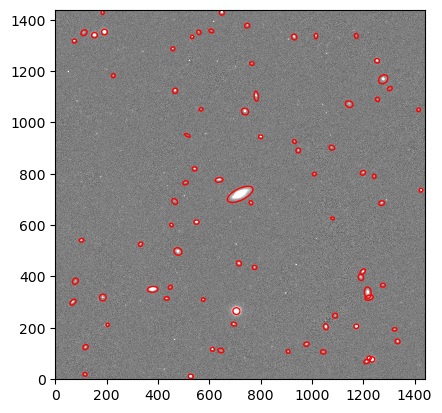

In [1217]:
# plot background-subtracted image
fig, ax = plt.subplots()
m, s = np.mean(fitsio.read(fits_files[0])), np.std(fitsio.read(fits_files[0]))
im = ax.imshow(fitsio.read(fits_files[0]), interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

# plot an ellipse for each object
for i in range(len(ob)):
    e = Ellipse(xy=(ob['x'][i], ob['y'][i]),
                width=6*ob['a'][i],
                height=6*ob['b'][i],
                angle=ob['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)

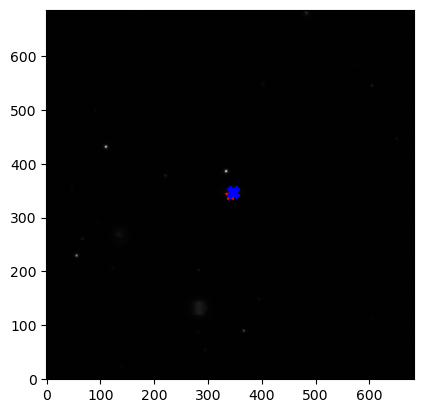

In [269]:
# Supernova RA and Dec
	
sn_ra = DES['RA'][21]   # in degrees
sn_dec = DES['DEC'][21]      # in degrees
# Convert to pixel coordinates
wcs = WCS(fitsio.read_header(DESfits_files[21]))
supernova_pixel = wcs.world_to_pixel(SkyCoord(ra=sn_ra*u.degree, dec=sn_dec*u.degree))

plt.imshow(data, origin='lower', cmap='gray')
plt.plot(supernova_pixel[0], supernova_pixel[1], color='red', marker='*',markersize=8)
plt.plot(ob['x'][2], ob['y'][2], color='blue', marker='X',markersize=8)
# plt.xlim(90,150)
# plt.ylim(85,145)
plt.show()

In [268]:
supernova_pixel[0], supernova_pixel[1]

(array(340.97863127), array(342.71422295))

In [187]:
fits_files[44]

'images/2021juw/PS1_riz.fits'

## Check Host ra and dec

In [1047]:
# if the host ra and host dec are far from the SN ra and dec, then the host is not the host
wrong_host2 = []
for i in range(len(DEBASS_Host)):
    if abs(DEBASS_Host['HOST_RA'][i] - DEBASS_Host['SN_RA'][i]) > 0.01 or abs(DEBASS_Host['HOST_DEC'][i] - DEBASS_Host['SN_DEC'][i]) > 0.01:
        wrong_host2.append(DEBASS_Host['snid'][i])
        #print(DEBASS_Host['snid'][i], 'might not be a correct host')
len(wrong_host2)

61

In [1048]:
wrong_host2

['2021hem',
 '2021hiz',
 '2021ghc',
 '2021fof',
 '2021ibo',
 '2021hup',
 '2021ipb',
 '2021iuk',
 '2021kpu',
 '2021acnx',
 '2021adlz',
 '2021acnt',
 '2021agjd',
 '2022hrs',
 '2022jnr',
 '2022nim',
 '2022qbp',
 '2022qke',
 '2022rfn',
 '2022sum',
 '2022xxz',
 '2022ywf',
 '2022abgg',
 '2022aduk',
 '2023aez',
 '2023bee',
 '2023bhb',
 '2023dva',
 '2023env',
 '2023gft',
 '2023gqi',
 '2023jsb',
 '2023mkt',
 '2023mnw',
 '2023ndf',
 '2023nqd',
 '2023ocj',
 '2023nup',
 '2023oho',
 '2023teu',
 '2023suh',
 '2023yzu',
 '2023yzw',
 '2023zax',
 '2023aald',
 '2023acgf',
 '2024gy',
 '2024axd',
 '2024bks',
 '2024fcd',
 '2024gbt',
 '2024pbe',
 '2021aaga',
 '2021aafz',
 '2021aefx',
 '2023ctf',
 '2023fpa',
 '2023tfg',
 '2023tfj',
 '2023vcr',
 '2023aaqu']

In [838]:
DEBASS_Host['HOST_RA'][15]-DEBASS_Host['SN_RA'][15], DEBASS_Host['HOST_DEC'][15]-DEBASS_Host['SN_DEC'][15]

(0.003153099999991582, -0.010055314999999787)

In [837]:
wrong_host2

['2021hem',
 '2021hiz',
 '2021ghc',
 '2021fof',
 '2021ibo',
 '2021ipb',
 '2021iuk',
 '2021acnx',
 '2021adlz',
 '2021acnt',
 '2021agjd',
 '2022hrs',
 '2022jnr',
 '2022nim',
 '2022qbp',
 '2022qke',
 '2022rfn',
 '2022sum',
 '2022xxz',
 '2022yjy',
 '2022ywf',
 '2022abgg',
 '2022aduk',
 '2023bee',
 '2023bhb',
 '2023dva',
 '2023env',
 '2023gft',
 '2023gqi',
 '2023jsb',
 '2023mkt',
 '2023mnw',
 '2023ndf',
 '2023nqd',
 '2023ocj',
 '2023nup',
 '2023teu',
 '2023suh',
 '2023yzu',
 '2023yzw',
 '2023zax',
 '2023aald',
 '2023acgf',
 '2024gy',
 '2024axd',
 '2024bks',
 '2024fcd',
 '2024gbt',
 '2024pbe',
 '2021aaga',
 '2021aafz',
 '2021aefx',
 '2023ctf',
 '2023fpa',
 '2023tfg',
 '2023tfj',
 '2023vcr',
 '2023aaqu']

In [834]:
wrong_host

['2021dev',
 '2021hem',
 '2021hjb',
 '2021hiz',
 '2021ghc',
 '2021fof',
 '2021gqc',
 '2021ibo',
 '2021ipb',
 '2021ill',
 '2021iuk',
 '2021jys',
 '2021jze',
 '2021khn',
 '2021knh',
 '2021kom',
 '2021kxf',
 '2021kbj',
 '2021yrz',
 '2021yzz',
 '2021zfs',
 '2021zqo',
 '2021aazj',
 '2021aceo',
 '2021abam',
 '2021acnx',
 '2021adlz',
 '2021acnt',
 '2021adoz',
 '2021aexy',
 '2021agjd',
 '2022hrs',
 '2022itd',
 '2022jmr',
 '2022jnr',
 '2022nbm',
 '2022nim',
 '2022qbp',
 '2022qke',
 '2022qwx',
 '2022qsn',
 '2022rfn',
 '2022rld',
 '2022rso',
 '2022sum',
 '2022suc',
 '2022vpn',
 '2022whp',
 '2022xhd',
 '2022xxz',
 '2022yjy',
 '2022ywf',
 '2022aajn',
 '2022abgg',
 '2022acyi',
 '2022aduk',
 '2023aoz',
 '2023bee',
 '2023bhb',
 '2023bpg',
 '2023bvw',
 '2023dva',
 '2023dxj',
 '2023env',
 '2023gfs',
 '2023gft',
 '2023goe',
 '2023gqi',
 '2023hwg',
 '2023iwu',
 '2023ito',
 '2023jvj',
 '2023jvm',
 '2023jsb',
 '2023kml',
 '2023lxj',
 '2023mde',
 '2023mbs',
 '2023mgq',
 '2023mkt',
 '2023mnw',
 '2023ngb',
 '2

# Photometry

In [24]:
Only_PS1 = pd.read_csv('Only_PS1.csv')
In_Both = pd.read_csv('In_Both.csv')
DE_DES = pd.read_csv('DES.csv')
DEBASS_Host = pd.read_csv('DEBASS_Host.csv')

all_names = DEBASS_Host['snid']

PS1_names = list(Only_PS1['snid'])
PS1_z = list(Only_PS1['Redshift'])

both_names = list(In_Both['snid'])
both_z = list(In_Both['Redshift'])

DES_names = list(DE_DES['snid'])
DES_z = list(DE_DES['Redshift'])

redshifts = list(DEBASS_Host['Redshift'])
ras = list(DEBASS_Host['SN_RA'])
decs = list(DEBASS_Host['SN_DEC'])
host_ras = list(DEBASS_Host['HOST_RA'])
host_decs = list(DEBASS_Host['HOST_DEC'])

# surveys = ['PS1']
# coadd_dict = {'PS1':'riz'} 

# surveys = ['PS1','SDSS']
# coadd_dict = {'PS1':'riz','SDSS':'riz'} 

In [558]:
len(PS1_names), len(both_names), len(DES_names)

(147, 176, 24)

In [559]:
n = 9
#surveys = ['DES']
all_names[n], redshifts[n], ras[n], decs[n], host_ras[n], host_decs[n] 

('2021dcu', 0.041798, 242.0259532, 25.48373103, 242.0271849, 25.4854832)

In [847]:
host_ras[n]-ras[n], host_decs[n]-decs[n]

(0.0008482000000071821, -0.00030697400000034847)

In [848]:
if all_names[n] in both_names:
    surveys = ['PS1','SDSS']
    coadd_dict = {'PS1':'riz','SDSS':'riz'} 
elif all_names[n] in PS1_names:
    surveys = ['PS1'] 
    coadd_dict = {'PS1':'riz'} 
surveys

['PS1', 'SDSS']

In [ ]:
#download_images(all_names[n], host_ras[n], host_decs[n], survey='PS1', size=8, overwrite=True)

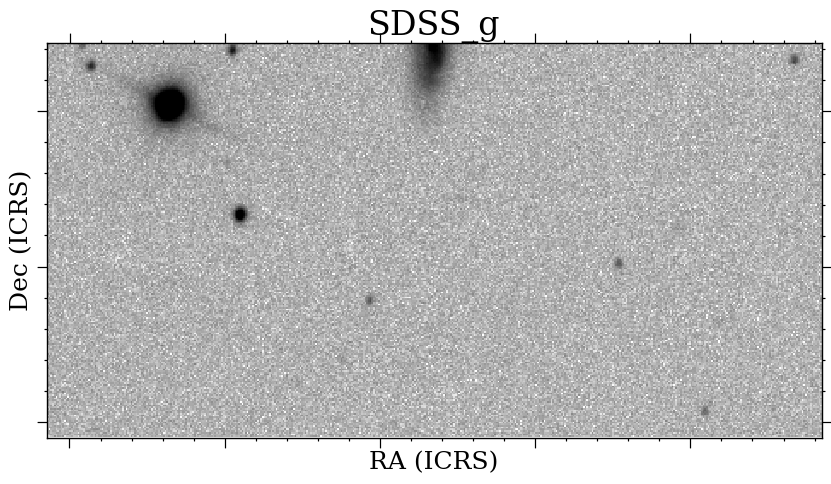

In [971]:
#plot_fits('images/2021agep/SDSS_g.fits')

In [823]:
coadd_mask_params = create_mask(all_names[n],ras[n],decs[n],
                                filt='riz', survey= 'PS1',
                                extract_params=True, crossmatch=True,
                                threshold=25)

In [244]:
sigma_dict = {survey:8 if survey!='GALEX' else 4 for survey in surveys}
for survey, coadd_filters in coadd_dict.items():
    filters = get_survey_filters(survey)
    for filt in filters:
        create_mask(all_names[n],ras[n],decs[n],
                    filt, survey=survey,
                    common_params=coadd_mask_params,
                    sigma=sigma_dict[survey])

In [560]:
eps = 0.0005
aperture_params = gp.extract_kronparams(all_names[n],host_ras[n],host_decs[n],
                                        filt = 'riz', survey = 'PS1',
                                        ra=ras[n], dec=decs[n], use_mask=True,
                                        optimize_kronrad=True, eps=eps,
                                        save_plots=True,
                                        save_aperture_params=True,
                                        threshold=1.5)

In [513]:
print(all_names[n],':(',aperture_params[0]['x'][0], aperture_params[0]['y'][0],')')

2021dcu :( 720.0658630330971 719.1184584980919 )


In [514]:
print(all_names[n],':(',aperture_params[0]['a'][0], 
      aperture_params[0]['b'][0], aperture_params[0]['theta'][0],')')

2021dcu :( 1.354080319404602 1.2287081480026245 0.7868258953094482 )


In [561]:
print(all_names[n],':(',aperture_params[0]['a'][0], 
      aperture_params[0]['b'][0], aperture_params[0]['theta'][0],')')

2021dcu :( 41.87862777709961 22.76742172241211 0.13581468164920807 )


In [250]:
for survey in surveys:
    gp.multi_band_phot(all_names[n],ras[n],decs[n],
                        survey=survey, ra=ras[n], dec=decs[n],
                        use_mask=True, correct_extinction=True,
                        aperture_params=aperture_params,
                        save_plots=True, save_results=True,
                        raise_exception=True)

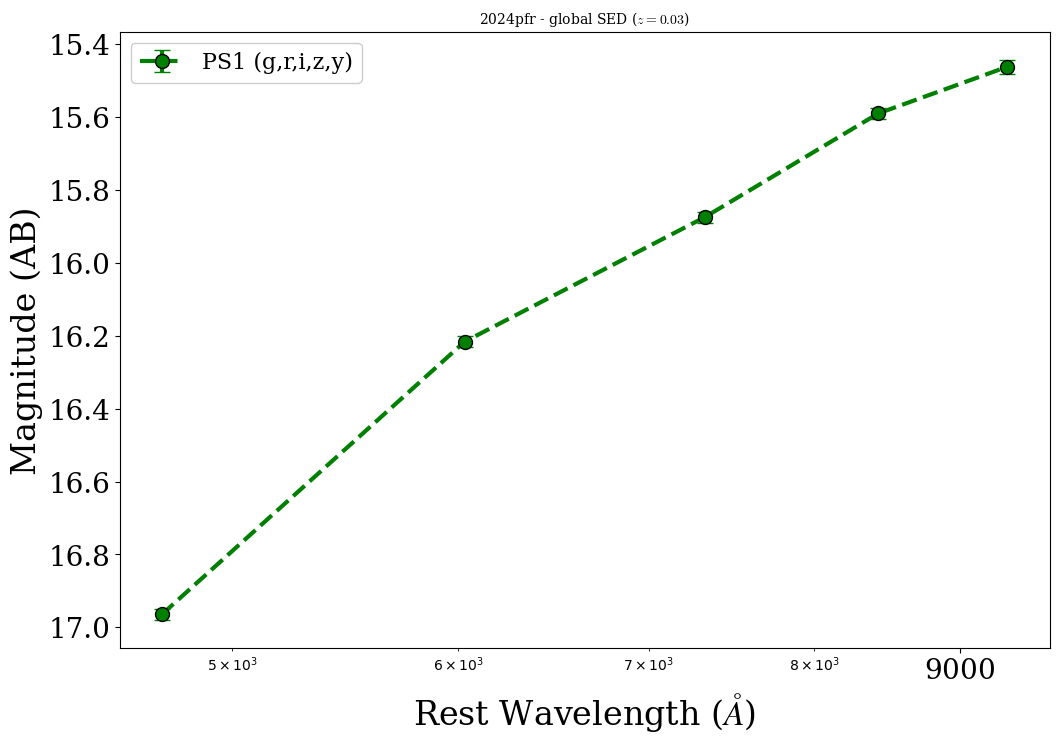

In [251]:
plot_sed(all_names[n], 'global', z=redshifts[n])

______________

# Store magnitudes and errors in text files

In [345]:
surveys = ['PS1','SDSS']
comb_dict = {'PS1':'grizy','SDSS':'ugriz'}
# survey_text = ['PS1']
# comb_dict = {'PS1':'grizy'}
filter_list = []
calib_types = []

filtered_filter_list = []
filtered_calib_types = []
keys = list(comb_dict.keys())
values = list(comb_dict.values())

filtered_mag_err = []
filtered_filter_list = []
filtered_calib_types = []

def extract_data(name,z):
    all_mag_err_new = [name, z, -9,  -9, -9]
    for survey, filters in comb_dict.items(): 
        for filter_name in filters: 
            if survey + '_data' in globals(): 
                all_mag_err_new.append(globals()[survey + '_data'].at[0,filter_name]) # magnitude
                all_mag_err_new.append(globals()[survey + '_data'].at[0,filter_name + '_err']) # error
            else: 
                print(f"Variable {survey}_data is not defined.")
    return all_mag_err_new

In [334]:
PS1csv = 'PS1_global.csv'
SDSScsv = 'SDSS_global.csv'
PS1csv_files = []
bothcsv_files = []
# DEBASS_finished = pd.read_csv('DEBASS_Finished_Yes.csv')
# names = DEBASS_finished['snid']
csv_files = []
name_list = []
for name in all_names:
    if name in PS1_names:
        #for file in os.listdir(f'images/{name}'):
            #if file == PS1csv:
        PS1csv_files.append(f'images/{name}/' + PS1csv)
    if name in both_names: 
        #for file in os.listdir(f'images/{name}'):
            #if file == PS1csv:
        bothcsv_files.append(f'images/{name}/' + PS1csv)
        bothcsv_files.append(f'images/{name}/' + SDSScsv)
            # elif file == SDSScsv:
            #     bothcsv_files.append(f'images/{name}/' + file)
paired_bothcsv_files = [(bothcsv_files[i], bothcsv_files[i+1]) for i in range(0, len(bothcsv_files), 2)]

In [384]:
with open('DEBASS_both_PS1SDSS.txt', 'w') as file:
    n = 0
    while n < len(both_names):
        PS1_data = pd.read_csv(paired_bothcsv_files[n][0]) #-2
        #修改最后的index n=6 PS1 = 0； SDSS=1
        SDSS_data = pd.read_csv(paired_bothcsv_files[n][1]) #-1
        filtered_mag_err = []  
        for m in range(5, len(extract_data(name=both_names[n], z=both_z[n])), 2):
            magnitude = extract_data(name=both_names[n], z=both_z[n])[m]
            error = extract_data(name=both_names[n], z=both_z[n])[m+1]
            if magnitude >= 0 and error <= 1:
                filtered_mag_err.append(round(magnitude,3))
                filtered_mag_err.append(round(error,3))
        extract_data(name=both_names[n], z=both_z[n])[5:] = filtered_mag_err
        first5 = extract_data(name=both_names[n], z=both_z[n])[:5]
        n += 1
        
        file.write(' '.join(str(item) for item in first5))
        file.write(' ')
        file.write(' '.join(str(item) for item in filtered_mag_err))
        file.write('\n')
        file.write('\n')

# Host Mass

## Extracte host mass from the server

In [434]:
# Define function to extract mass and name
def extract_name_and_mass(file_path, output_csv_path):
    # Open the file for reading
    with open(file_path, 'r') as file:
        lines = file.readlines()

    # Prepare the data for CSV
    data = []
    for line in lines:
        if line.strip() and not line.startswith("#"):  # Skip empty lines and headers
            columns = line.split()
            if len(columns) > 5:  # Ensure that there are enough columns to avoid errors
                name = columns[0]
                mass = float(columns[5])  # Convert the mass to float
                data.append([name, mass])

    # Write the data to a CSV file
    with open(output_csv_path, 'w', newline='') as csv_file:
        writer = csv.writer(csv_file)
        writer.writerow(["snid", "Mass"])
        writer.writerows(data)


In [435]:
# Extract masses for PS1_ only and PS1_SDSS separately
extract_name_and_mass('results_DEBASS_PS1.txt_pegase_Kro_test.sav.txt','DE_PS1mass.csv')
extract_name_and_mass('results_DEBASS_both_PS1SDSS.txt_pegase_Kro_test.sav.txt','DE_PS1SDSSmass.csv')

In [442]:
# Concatenate the two DataFrames
DE_PS1mass = pd.read_csv('DE_PS1mass.csv')
DE_PS1SDSSmass = pd.read_csv('DE_PS1SDSSmass.csv')
DE_allM = pd.concat([DE_PS1mass, DE_PS1SDSSmass], axis=0,ignore_index=True)

,snid,Mass
0,2021cyn,10.367
1,2021hjc,10.604
2,2021grd,10.942
3,2021fna,10.533
4,2021gkb,11.301
...,...,...
268,2024cvb,11.199
269,2024fwj,10.366
270,2024gpq,9.091
271,2024inv,9.615


In [443]:
# Merge the mass data with the DEBASS_Host DataFrame
DE_allMass = []
for i in range(len(DEBASS_Host)):
    snid = DEBASS_Host['snid'][i]
    if snid in list(DE_allM['snid']):
        DE_allMass.append(DE_allM.loc[DE_allM['snid'] == snid, 'Mass'].values[0])
    else:
        DE_allMass.append('N/A')

DEBASS_Host['LOGMASS'] = DE_allMass
DEBASS_Host.to_csv('DEBASS_Host.csv', index=True)

## Mass comparison histogram

DEBASS median: 10.327
Foundation median: 10.27


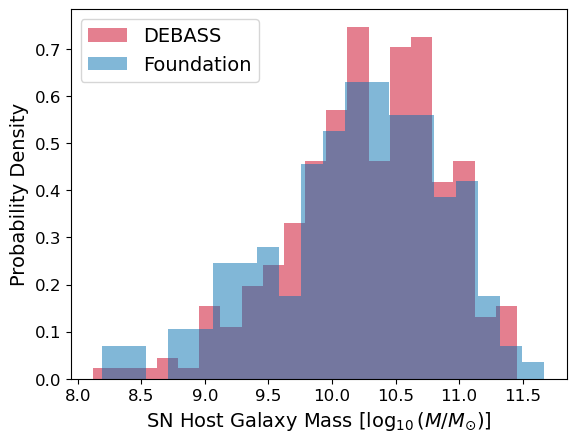

In [33]:
FN_mass_reorder = pd.read_csv('FN_mass_reorder.csv')
DEBASS_allHost = pd.read_csv('DEBASS_allHost.csv')
plt.hist(DEBASS_allHost['LOGMASS'], color='#ca0020',density=True,bins=20, alpha=0.5, label='DEBASS')
plt.hist(FN_mass_reorder['mass'],color='#0571b0',density=True, bins=20, alpha=0.5, label='Foundation')
#plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.legend(loc='upper left',fontsize=14)
plt.xlabel('SN Host Galaxy Mass [$\log_{10}(M / M_{\odot})$]',fontsize=14)
plt.ylabel('Probability Density',fontsize=14) 
plt.tick_params(labelsize = 12)
#plt.savefig('DEBASS_FN_M_hist.pdf')
print('DEBASS median:', np.median(DEBASS_allHost['LOGMASS']))
print('Foundation median:', np.median(FN_mass_reorder['mass']))

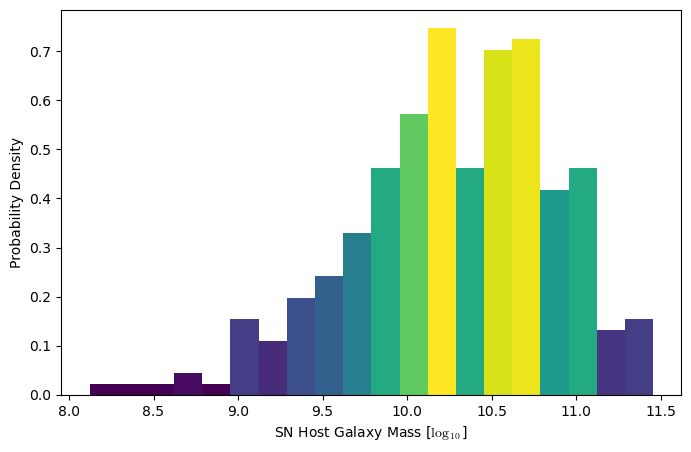

In [509]:
plt.figure(figsize=(8,5))
N, bins, patches = plt.hist(DE_allM['Mass'], density=True,bins=20)
fracs = N / N.max()
norm = colors.Normalize(fracs.min(), fracs.max())

for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

plt.xlabel('SN Host Galaxy Mass [$\log_{10}$]')
plt.ylabel('Probability Density')
plt.savefig('DEBASS_M_hist.pdf')
#plt.title('Histogram of DEBASS Host Galaxy Mass ')

DEBASS median: 0.04277
Foundation median: 0.031175


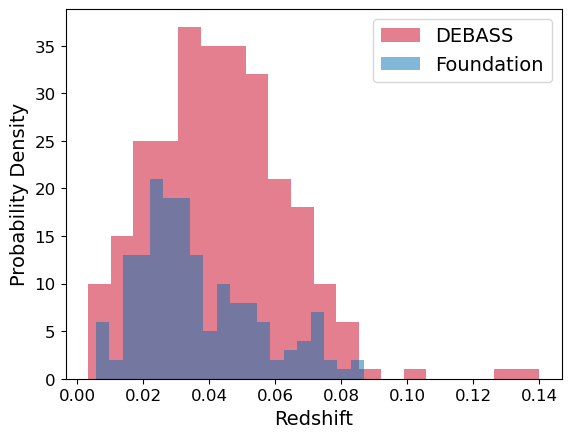

In [35]:
#DEBASS_allHost
FN_Host = pd.read_csv('FN_Host_Properties.csv')

plt.hist(DEBASS_allHost['Redshift'], color='#ca0020',density=False,bins=20, alpha=0.5, label='DEBASS')
plt.hist(FN_Host['Redshift'],color='#0571b0',density=False, bins=20, alpha=0.5, label='Foundation')
plt.legend(loc='upper right',fontsize=14)
plt.xlabel('Redshift',fontsize=14)
plt.ylabel('Probability Density',fontsize=14) 
plt.tick_params(labelsize = 12)
#plt.savefig('DEBASS_FN_M_hist.pdf')
print('DEBASS median:', np.median(DEBASS_allHost['Redshift']))
print('Foundation median:', np.median(FN_Host['Redshift']))

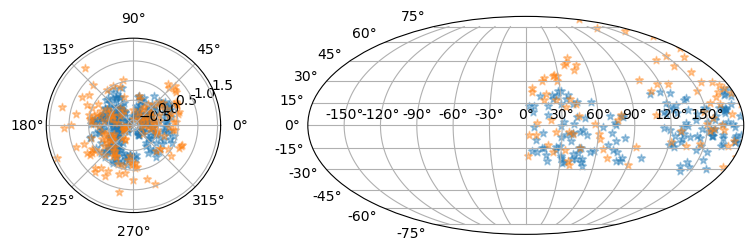

In [54]:
import matplotlib.gridspec as gridspec
#DEBASS_updated = pd.read_csv('DEBASS Sample-Updated.csv')
gs = gridspec.GridSpec(1, 3, wspace=0.5)
fig = plt.figure(figsize=(9, 4))

ax1 = fig.add_subplot(gs[0], projection='polar')
ax1.scatter(np.deg2rad(DEBASS_allHost['SN_RA']), np.deg2rad(DEBASS_allHost['SN_DEC']),marker='*', alpha=0.4)
ax1.scatter(np.deg2rad(FN_Host['SN_RA']), np.deg2rad(FN_Host['SN_DEC']),marker='*', alpha=0.4)

ax = fig.add_subplot(gs[1:], projection='mollweide')
ax.scatter(np.deg2rad(DEBASS_allHost['SN_RA']), np.deg2rad(DEBASS_allHost['SN_DEC']),marker='*', alpha=0.4)
ax.scatter(np.deg2rad(FN_Host['SN_RA']), np.deg2rad(FN_Host['SN_DEC']),marker='*', alpha=0.4)
ax.grid()

## Compare with Childress mass distribution model

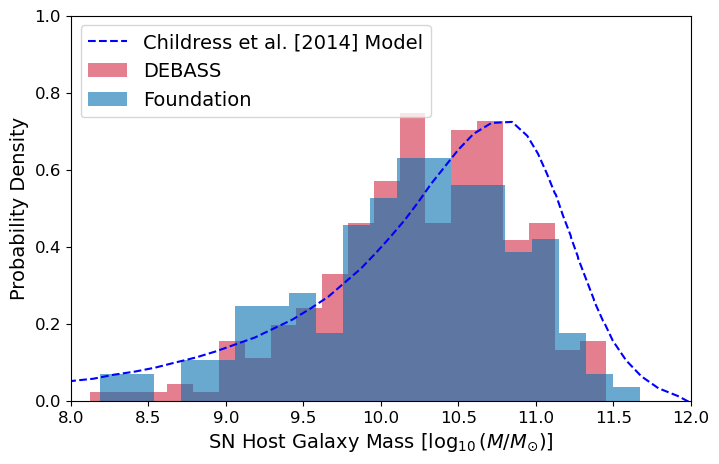

In [57]:
Mass_model = pd.read_csv('Model Prediction.csv')
# host_log_stellar_mass = np.array([8, 8.5, 9, 9.5, 10, 10.5, 10.7, 11, 11.5, 12])
# number_sne =            np.array([5, 10, 15, 35, 50,     80,   88, 80, 8, 5])
# plt.plot(host_log_stellar_mass,number_sne,'--',label='Model Prediction',color='blue')  
plt.figure(figsize=(8,5)) 
plt.plot(Mass_model['Mass']+0.2,Mass_model['Number']/1.3,'--',label='Childress et al. [2014] Model',color='blue')
plt.hist(DEBASS_allHost['LOGMASS'], color='#ca0020',density=True,bins=20, alpha=0.5, label='DEBASS')
plt.hist(FN_mass_reorder['mass'],color='#0571b0', density=True,bins=20,alpha=0.6, label='Foundation')
#plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.legend(loc='upper left',fontsize=14)
plt.xlabel('SN Host Galaxy Mass [$\log_{10}(M / M_{\odot})$]',fontsize=14)
plt.ylabel('Probability Density',fontsize=14) 
plt.tick_params(labelsize = 12)
plt.xlim(8,12)
plt.ylim(0,1.0)
plt.savefig('M vs Model.pdf')

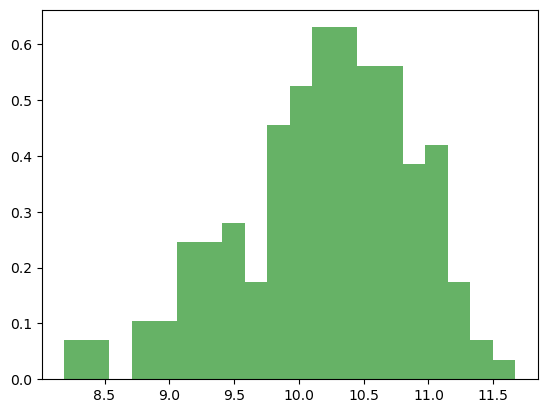

In [25]:
hist_values, _,_ = plt.hist(FN_mass_reorder['mass'], bins=20, density=True, alpha=0.6, color='g')

In [26]:
histogram_integral = np.sum(hist_values)
model_integral = np.trapz(Mass_model['Mass'],Mass_model['Number'])
normalization_factor = histogram_integral / model_integral

normalization_factor

-1.3142574081602774

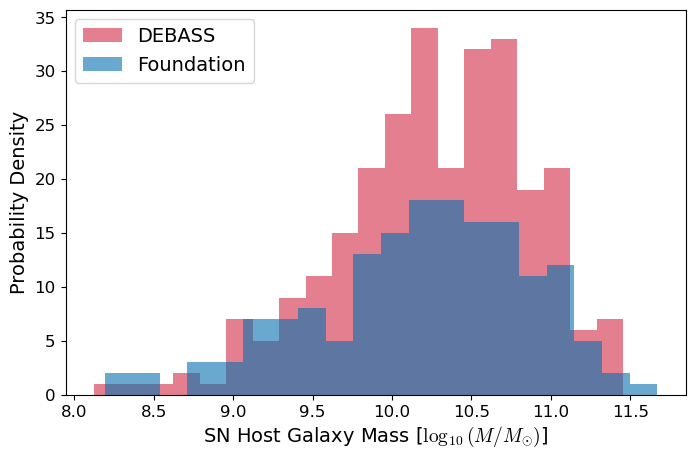

In [99]:
Mass_model = pd.read_csv('Model Prediction.csv')
# host_log_stellar_mass = np.array([8, 8.5, 9, 9.5, 10, 10.5, 10.7, 11, 11.5, 12])
# number_sne =            np.array([5, 10, 15, 35, 50,     80,   88, 80, 8, 5])
# plt.plot(host_log_stellar_mass,number_sne,'--',label='Model Prediction',color='blue')  
plt.figure(figsize=(8,5)) 
plt.hist(DEBASS_allHost['LOGMASS'], color='#ca0020',bins=20, alpha=0.5, label='DEBASS')
plt.hist(FN_mass_reorder['mass'],color='#0571b0', bins=20,alpha=0.6, label='Foundation')
#plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.legend(loc='upper left',fontsize=14)
plt.xlabel('SN Host Galaxy Mass [$\log_{10}(M / M_{\odot})$]',fontsize=14)
plt.ylabel('Probability Density',fontsize=14) 
plt.tick_params(labelsize = 12)

## Statistical Analysis

Using the Kolmogorov-Smirnov test, we can compare the mass distributions of the two samples. The null hypothesis is that the two samples are drawn from the same distribution. The p-value is the probability of observing a test statistic as extreme as the one computed from the data, assuming that the null hypothesis is true. If the p-value is less than the significance level (0.05), we reject the null hypothesis and conclude that the two samples are drawn from different distributions.

$$H_0: \text{The two samples are drawn from the same distribution.}$$
$$H_1: \text{The two samples are drawn from different distributions.}$$


In [501]:
ks_2samp(list(DE_allM['Mass']), list(FN_mass_reorder['mass']))

KstestResult(statistic=0.07547127669078889, pvalue=0.5682223744274552, statistic_location=9.546, statistic_sign=-1)

# (U-R) color

In [577]:
c=conts.c.value
h=(conts.h).value

In [398]:
def computeColour(SED, filter1, filter2, system="AB", Vega=None):
    # We compute the AB magnitudes by default
    # One can add Vega magnitudes if needed
    
    # Interpolate the SED and filter curves over steps in wavelength
    
    # Filter 1
    
    wmin=np.min(filter1['wavelength'])
    wmax=np.max(filter1['wavelength'])
    wstep=1.0
    
    wavelength1=np.arange(wmin,wmax+wstep,wstep)
    
    T_filter1=interp1d(filter1['wavelength'],filter1['transmission'],
                       bounds_error=False, fill_value=0.0)(wavelength1)
 
    SED_interp=interp1d(SED['wavelength'],SED['luminosity'],
                       bounds_error=False, fill_value=0.0)(wavelength1)
    
    
    # Compute the upper intergral
    upper=trapezoid(SED_interp * T_filter1 / c / h * wavelength1,wavelength1)
    
    # Compute the lower intergral
    if system == "AB":
        lower=trapezoid(3631e-23 * T_filter1 / c / h * wavelength1,wavelength1)
    else:
        Vega_interp=interp1d(Vega['wavelength'],Vega['luminosity'],
                       bounds_error=False, fill_value=0.0)(wavelength1)
    
        lower=trapezoid( Vega_interp * T_filter1 / c / h * wavelength1,wavelength1)

    # We could simplify this by cancelling out some constants
    # For magnitudes
    #    upper=trapezoid(SED_interp * T_filter1 * wavelength1,wavelength1)
    #    lower=trapezoid(3631e-23 * T_filter1 * wavelength1,wavelength1)
    # For colours, one could further simplify
    #    lower=trapezoid(T_filter1 * wavelength1,wavelength1)    
 
    mag1=-2.5*np.log10(upper/lower)
    
    # Filter 2
    
    wmin=np.min(filter2['wavelength'])
    wmax=np.max(filter2['wavelength'])
    wstep=1.0

    wavelength2=np.arange(wmin,wmax+wstep,wstep)
    
    T_filter2=interp1d(filter2['wavelength'],filter2['transmission'],
                       bounds_error=False, fill_value=0.0)(wavelength2)

    SED_interp=interp1d(SED['wavelength'],SED['luminosity'],
                       bounds_error=False, fill_value=0.0)(wavelength2)

    # Compute the intergrals
    upper=trapezoid(SED_interp * T_filter2 / c / h * wavelength2, wavelength2)
    # Compute the lower intergral
    if system == "AB":
        lower=trapezoid(3631e-23 * T_filter2 / c / h * wavelength2,wavelength2)
    else:
        Vega_interp=interp1d(Vega['wavelength'],Vega['luminosity'],
                       bounds_error=False, fill_value=0.0)(wavelength2)
    
        lower=trapezoid(Vega_interp  * T_filter2 / c / h * wavelength2,wavelength2)
    
    mag2=-2.5*np.log10(upper/lower)
 
    colour=mag1-mag2
    
    return colour


In [406]:
u_filter="sux.dat" # Used Bessell filter curves used in SALT2
r_filter="sr.dat"
Vega="alpha_lyr_stis_005.ascii"

Vega=np.genfromtxt(Vega, names = ['wavelength','luminosity'])
u_filterCurve=np.genfromtxt(u_filter, names = ['wavelength','transmission'])
r_filterCurve=np.genfromtxt(r_filter, names = ['wavelength','transmission'])


folder_path = "DEBASS_sedfittingDATA"
results = []
for filename in os.listdir(folder_path):
    if filename.endswith('.txt'):
        SED=np.genfromtxt(os.path.join(folder_path, filename), names = ['wavelength','luminosity'])
        colour=computeColour(SED, u_filterCurve, r_filterCurve, "Vega", Vega=Vega)
        results.append((filename[:-4], colour))

Host_color_Vega = pd.DataFrame(results, columns=['snid', 'u-r Color'])
Host_color_Vega.to_csv('DEBASS_color_Vega.csv', index=True)

In [402]:
np.median(Host_color_Vega['u-r Color']),min(Host_color_Vega['u-r Color']),max(Host_color_Vega['u-r Color'])

(1.0113102332282153, -0.4668326911114207, 1.8905519945545848)

DEBASS median ~ 1.011
Foundation median ~ 1.073


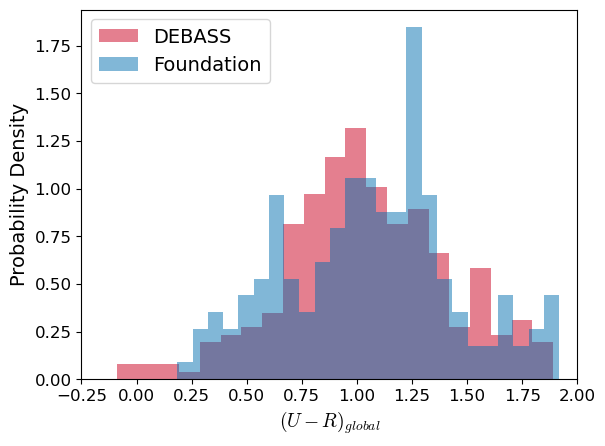

In [92]:
FN_color = pd.read_csv('Host_color_Vega_reorder.csv')
Host_color_Vega = pd.read_csv('DEBASS_color_Vega.csv')
plt.hist(Host_color_Vega['u-r Color'], bins=25, density=True, histtype='stepfilled', alpha=0.5,color='#ca0020')
plt.hist(FN_color['u-r Color'], bins=25,density=True, histtype='stepfilled', alpha=0.5,color='#0571b0')
plt.xlabel('$(U-R)_{global}$',fontsize=14)
plt.ylabel('Probability Density',fontsize=14)
plt.xlim(-0.25,2.0)
plt.legend(['DEBASS','Foundation'],loc='upper left',fontsize=14)
plt.tick_params(labelsize = 12)
plt.savefig('DEBASS_FN_color_hist.pdf')
print('DEBASS median ~ %4.3f' %np.median(Host_color_Vega['u-r Color']))
print('Foundation median ~ %4.3f' %np.median(FN_color['u-r Color']))

In [514]:
ks_2samp(list(Host_color_Vega['u-r Color']), list(FN_color['u-r Color']))

KstestResult(statistic=0.0921111408916287, pvalue=0.32425839420429065, statistic_location=1.0280864165716679, statistic_sign=1)

In [419]:
U_R = []
DEBASS_color = pd.read_csv('DEBASS_color_Vega.csv')
for i in range(len(DEBASS_Host)):
    snid = DEBASS_Host['snid'][i]
    if snid in list(DEBASS_color['snid']):
        U_R.append(DEBASS_color.loc[DEBASS_color['snid'] == snid, 'u-r Color'].values[0])
    else:
        U_R.append('N/A')

In [422]:
DEBASS_Host['U-R'] = U_R

DEBASS_Host.drop(columns=['Unnamed: 0'], inplace=True)

DEBASS_Host.to_csv('DEBASS_Host.csv', index=True)

# dDLR

DEBASS median ~ 1.288
Foundation median ~ 1.412


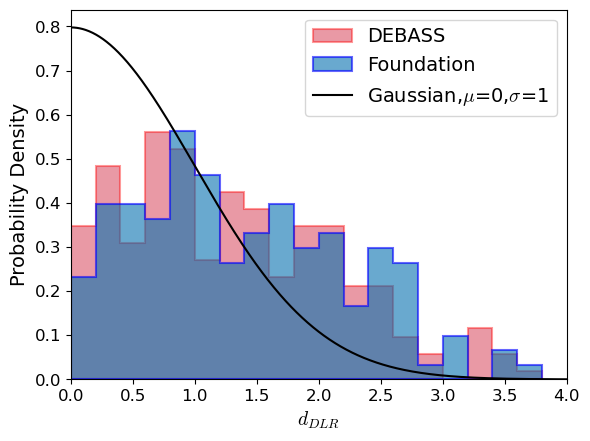

In [96]:
FN_HostProperties = pd.read_csv('FN_Host_Properties.csv')
Host_color_Vega = pd.read_csv('DEBASS_color_Vega.csv')
plt.hist(DEBASS_allHost['dDLR'], bins=np.arange(0,4,0.2), density=True, stacked = True, histtype='stepfilled', alpha=0.4,color='#ca0020',edgecolor='r', linewidth=1.5,align='mid',label='DEBASS')   
plt.hist(FN_HostProperties['dDLR'], bins=np.arange(0,4,0.2),density=True,stacked = True, histtype='stepfilled', alpha=0.6,color='#0571b0',edgecolor='b', linewidth=1.5,align='mid',label='Foundation')
plt.xlabel('$d_{DLR}$',fontsize=14)
plt.ylabel('Probability Density',fontsize=14)
plt.xlim(0,4.0)
# Define Gaussian function
# This needs to be a one-sided Guassian
def gaussian(x, mean, sigma):
    return (2./(sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / sigma)**2)

# Generate x values for the Gaussian curve
x = np.linspace(0,4, 1000)

plt.plot(x, gaussian(x, 0, 1), label='Gaussian,$\mu$=0,$\sigma$=1',color='black')
# plt.plot(x, gaussian(x, 0, np.median(dDLR)), label='Gaussian_2')
plt.legend(fontsize=14)
plt.tick_params(labelsize = 12)
plt.savefig('DEBASS_FN_dDLR_hist.pdf')
print('DEBASS median ~ %4.3f' %np.median(DEBASS_allHost['dDLR']))
print('Foundation median ~ %4.3f' %np.median(FN_HostProperties['dDLR']))

273


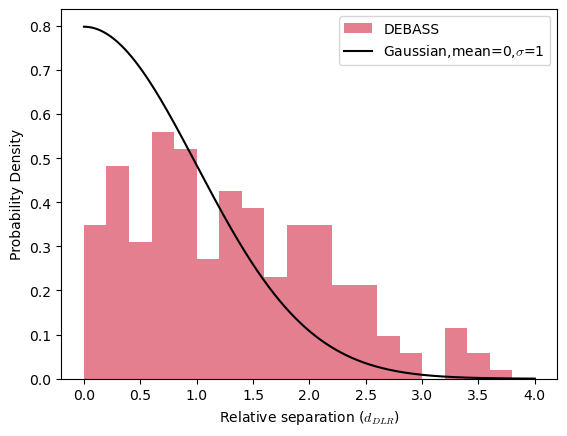

In [73]:
print(len(DEBASS_allHost['dDLR']))
bins=np.arange(0,4,0.2)
plt.hist(DEBASS_allHost['dDLR'], bins=bins, density=True,histtype='stepfilled', rwidth=0.85,alpha=0.5,color='#ca0020',label="DEBASS")
plt.xlabel('Relative separation ($d_{DLR}$)')
plt.ylabel('Probability Density')

# Define Gaussian function
# This needs to be a one-sided Guassian
def gaussian(x, mean, sigma):
    return (2./(sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / sigma)**2)

# Generate x values for the Gaussian curve
x = np.linspace(0,4, 1000)

plt.plot(x, gaussian(x, 0, 1), label='Gaussian,mean=0,$\sigma$=1',color='black')
#plt.plot(x, gaussian(x, 0, np.median(dDLR)), label='Gaussian_2')
plt.legend()

plt.savefig('DEBASS_dDLR_hist.pdf')

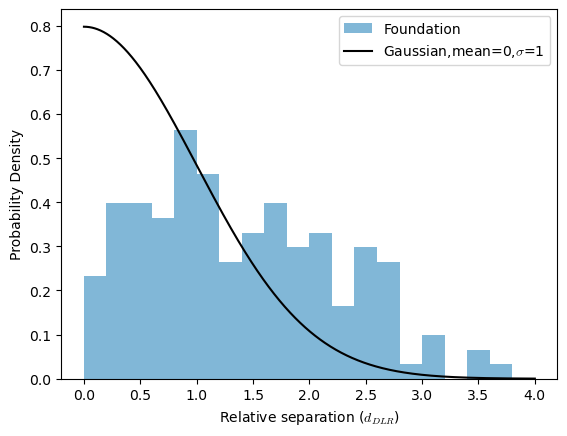

In [74]:
bins=np.arange(0,4,0.2)
plt.hist(FN_HostProperties['dDLR'], bins=bins, density=True,histtype='stepfilled', rwidth=0.85,alpha=0.5,color='#0571b0',label="Foundation")
plt.xlabel('Relative separation ($d_{DLR}$)')
plt.ylabel('Probability Density')

# Define Gaussian function
# This needs to be a one-sided Guassian
def gaussian(x, mean, sigma):
    return (2./(sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / sigma)**2)

# Generate x values for the Gaussian curve
x = np.linspace(0,4, 1000)

plt.plot(x, gaussian(x, 0, 1), label='Gaussian,mean=0,$\sigma$=1',color='black')
#plt.plot(x, gaussian(x, 0, np.median(dDLR)), label='Gaussian_2')
plt.legend()

plt.savefig('FN_dDLR_hist.pdf')

In [75]:
ks_2samp(list(DEBASS_allHost['dDLR']), list(FN_HostProperties['dDLR']))

KstestResult(statistic=0.08704100777271509, pvalue=0.39216966991158175, statistic_location=0.86345016380404, statistic_sign=1)

# Directional Light Radius

$$DLR = \frac{ab}{\sqrt{(a\sin{\theta})^{2} + (b\cos{\theta})^{2}}} $$
$a$ = major axis in arcsec, $b$ = minor axis in arcsec, $\theta$ = position angle in degrees

$$d_{DLR} = \frac{\alpha}{DLR} $$
$\alpha$ is angular separation in arcsec, DLR is in arcsec

## Angular Separation

In [550]:
SN_RA = np.array(DEBASS_allHost['SN_RA'])
SN_DEC = np.array(DEBASS_allHost['SN_DEC'])
HOST_RA = np.array(DEBASS_allHost['HOST_RA'])
HOST_DEC = np.array(DEBASS_allHost['HOST_DEC'])

In [551]:
deg2rad=np.pi / 180.

delta_RA=(SN_RA-HOST_RA)*np.cos(SN_DEC * deg2rad)
delta_DEC=SN_DEC-HOST_DEC

# The separation of the SN from the host

ANG_SEP = (np.sqrt(delta_RA**2+delta_DEC**2))*(u.deg).to(u.arcsec)

# The position angle of the SN on the sky relative to the host !!

PA_SN=np.arctan2(delta_DEC,-delta_RA)-np.pi/2

## DLR

In [547]:
# Pixel scale
pixel_scales = []
for file in fits_files:
    #data = fitsio.read(file)
    header = fitsio.read_header(file)
    pixel_scale = header['CDELT1']
    pixel_scales.append(pixel_scale)
pixel_scale = pixel_scales[0]*u.deg.to(u.arcsec) # arcsec per pixel

In [ ]:
# Get the pixel scale of the image
index = 0 # 2021dha
#survey = 'PS1'
obj_dir = os.path.join(workdir, '2021dha')
obj_PS1fits = os.path.join(obj_dir, f"{'PS1'}_{'riz'}.fits")
#obj_SDSSfits = os.path.join(obj_dir, f"{'SDSS'}_{'riz'}.fits")
img_wcs_PS1 = AsWCS.WCS(fitsio.read_header(obj_PS1fits), naxis=2)
#img_wcs_SDSS = AsWCS.WCS(fitsio.read_header(obj_SDSSfits), naxis=2)

pixel_scale_PS1 = ((img_wcs_PS1.proj_plane_pixel_scales())[0]).to(u.arcsec)

In [552]:
# Shape parameters, convert to arcsec
DEBASS_shape_pixel = pd.read_csv('DEBASS_ShapeParameters copy.csv')
a_IMAGE = []
b_IMAGE = []
theta_IMAGE = []
for i in range(len(DEBASS_shape_pixel)):
    if DEBASS_shape_pixel['a'][i] not in ['N/A','N/A?']:
        a_IMAGE.append(float(DEBASS_shape_pixel['a'][i])*pixel_scale_PS1.value) # arcsec
        b_IMAGE.append(float(DEBASS_shape_pixel['b'][i])*pixel_scale_PS1.value) # arcsec
        #theta_IMAGE.append(float(DEBASS_shape_pixel['theta'][i])) # radians


# # Remove nan values
# a_IMAGE = [x for x in a_IMAGE if str(x) != 'nan']
# b_IMAGE = [x for x in b_IMAGE if str(x) != 'nan']
# theta_IMAGE = [x for x in theta_IMAGE if str(x) != 'nan']

# Save as a csv file
# DEBASS_shape_arcsec = pd.DataFrame({'snid':Host_color_Vega['snid'],'a_IMAGE':a_IMAGE,'b_IMAGE':b_IMAGE,'theta_IMAGE':theta_IMAGE})
# DEBASS_shape_arcsec.to_csv('DEBASS_ShapeParameter_arcsec.csv', index=True)

In [554]:
# Assume all PS1 images have the same angle on sky - this needs to be tested
# The PA of the major axis    !!!
rot_offset= np.pi / 2.
PA=DEBASS_shape_pixel['theta'][i]+rot_offset 

# The angular offset between the SN and the host's major acis

delta_PA=PA_SN-PA

In [484]:
def compute_position_angle(name,survey,theta, filt='riz'):
    # Load the WCS information
    obj_dir = os.path.join(workdir, name)
    obj_fits = os.path.join(obj_dir, f"{survey}_{filt}.fits")
    img_wcs = WCS(fitsio.read_header(obj_fits))

    # Compute the rotation angle of the image in degree
    rotation_angle = (img_wcs.get_rot())
    # This is a rotation angle of zero aligns north along the positive Y axis, 
    # A positive rotation angle rotates north away from the Y axis, in the sense of a rotation from north to east.


    # Convert the provided theta to position angle
    position_angle = np.deg2rad((-rotation_angle) - 90 + np.rad2deg(theta))

    # First normalize to -pi to pi
    normalized_PA = (position_angle + np.pi) % (2 * np.pi) - np.pi

    # Now adjust to -pi/2 to pi/2
    if normalized_PA < -np.pi / 2:
        normalized_PA += np.pi
    elif normalized_PA > np.pi / 2:
        normalized_PA -= np.pi

    return normalized_PA

In [ ]:
#DEPS1_shape_pixel = pd.read_csv('DEPS1_shapeparams_pixel.csv')
PA_PS1 = []
for i in range(len(a_IMAGE)):
    survey = 'PS1'
    name = DEBASS_shape_pixel['snid'][i]
    theta = theta_IMAGE[i]
    position_angle = compute_position_angle(name,survey,theta, filt='riz')
    PA_PS1.append(position_angle)

In [555]:
DLRs = [] # arcsec
for i in range(len(a_IMAGE)):
    DLR = (a_IMAGE[i]*b_IMAGE[i])/(np.sqrt((a_IMAGE[i]*np.sin(delta_PA[i]))**2 + (b_IMAGE[i]*np.cos(delta_PA[i]))**2))
    DLRs.append(DLR)

In [475]:
SN_RA = [] # degrees
SN_DEC = []
HOST_RA = []
HOST_DEC = []

for i in range(len(Host_color_Vega['snid'])):
    snid = Host_color_Vega['snid'][i]
    if snid in list(DEBASS_Host['snid']):
        SN_RA.append(DEBASS_Host.loc[DEBASS_Host['snid'] == snid, 'SN_RA'].values[0])
        SN_DEC.append(DEBASS_Host.loc[DEBASS_Host['snid'] == snid, 'SN_DEC'].values[0])
        HOST_RA.append(DEBASS_Host.loc[DEBASS_Host['snid'] == snid, 'HOST_RA'].values[0])
        HOST_DEC.append(DEBASS_Host.loc[DEBASS_Host['snid'] == snid, 'HOST_DEC'].values[0])
    else:
        continue

In [544]:
# angular separation between SN and host using formular
ANG_SEP = [] # arcsec
for i in range(len(SN_RA)):
    ang_sep_deg = np.sqrt(((SN_RA[i]-HOST_RA[i])*np.cos(SN_DEC[i]))**2 + (SN_DEC[i]-HOST_DEC[i])**2)
    ang_sep_arcsec = (ang_sep_deg*(u.deg)).to(u.arcsec)
    ANG_SEP.append(ang_sep_arcsec.value)
min(ANG_SEP),max(ANG_SEP),np.median(ANG_SEP)

(0.07388836572197835, 44.961232641577205, 4.670140531392933)

In [477]:
# angular separation between SN and host using SkyCoord
ang_sep = []
for i in range(len(SN_RA)):
    c1 = SkyCoord(ra=SN_RA[i]*u.degree, dec=SN_DEC[i]*u.degree)
    c2 = SkyCoord(ra=HOST_RA[i]*u.degree, dec=HOST_DEC[i]*u.degree)
    ang_sep.append(c1.separation(c2).arcsec)
min(ang_sep),max(ang_sep),np.median(ang_sep)

(0.11793680922128931, 46.377973184611925, 5.69686622935935)

## $d_{DLR}$

perhaps ang_sep is larger (host ra and dec still not accurate enough)

In [556]:
d_DLR = np.array(ANG_SEP)/np.array(DLRs)
selected_dDLR = d_DLR[(d_DLR > 0) & (d_DLR <= 4)]

In [1083]:
# Merge the mass data with the DEBASS_Host DataFrame
alldlr = []
DE_alldlr = pd.DataFrame({'snid':Host_color_Vega['snid'],'dDLR':d_DLR})
for i in range(len(DEBASS_Host)):
    snid = DEBASS_Host['snid'][i]
    if snid in list(DE_alldlr['snid']):
        alldlr.append(DE_alldlr.loc[DE_alldlr['snid'] == snid, 'dDLR'].values[0])
    else:
        alldlr.append('N/A')

DEBASS_Host['dDLR'] = alldlr
DEBASS_Host.to_csv('DEBASS_Host.csv', index=True)
DE_alldlr.to_csv('DE_all_dDLR.csv', index=True)

In [1201]:
len(selected_dDLR[selected_dDLR < 1.0]),len(selected_dDLR[selected_dDLR >= 1.0])

(38, 100)

In [1202]:
DE_alldlr[(DE_alldlr['dDLR'] >3.5)]

,snid,dDLR
0,2021ymn,4.582170
1,2021kre,6.634860
6,2023boc,3.636417
7,2021jad,6.800440
10,2022abic,10.393411
...,...,...
264,2022taw,8.823405
269,2023nzu,3.854778
270,2023ehl,31.957998
271,2021adug,37.335912


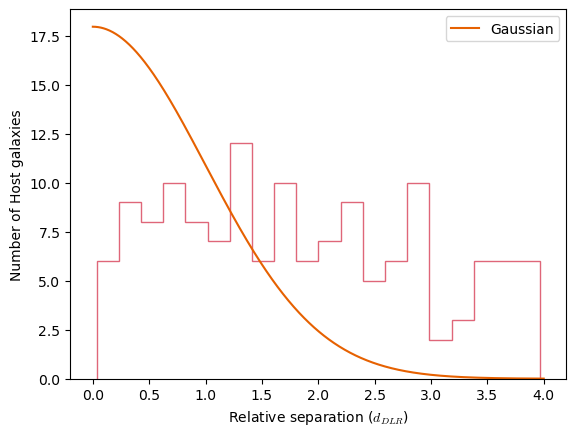

In [557]:
plt.hist(selected_dDLR, bins=20, histtype='step', alpha=0.6,color='#ca0020')
plt.xlabel('Relative separation ($d_{DLR}$)')
plt.ylabel('Number of Host galaxies')

# Define Gaussian function
def gaussian(x, mean, sigma):
    return (1/(sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / sigma)**2)

# Generate x values for the Gaussian curve
x = np.linspace(0,4, 1000)
y = gaussian(x, 0, 1)*45

plt.plot(x, y,color='#e66101', label='Gaussian')
plt.legend()
#plt.savefig('host dDLR dist.pdf')

# 2021dha

In [172]:
n = 0
#surveys = ['DES']
all_names[n], redshifts[n], ras[n], decs[n], host_ras[n], host_decs[n] 

('2021dha', 0.080206, 172.9102667, 14.0762639, 172.9077646, 14.07737296)

In [173]:
if all_names[n] in both_names:
    surveys = ['PS1','SDSS']
    coadd_dict = {'PS1':'riz','SDSS':'riz'} 
elif all_names[n] in PS1_names:
    surveys = ['PS1'] 
    coadd_dict = {'PS1':'riz'} 
surveys

['PS1', 'SDSS']

In [174]:
coadd_mask_params = create_mask(all_names[n],host_ras[n],host_decs[n],
                                filt='riz', survey= 'SDSS',
                                extract_params=True, crossmatch=True,
                                threshold=15)

In [177]:
eps = 0.0005
aperture_params = gp.extract_kronparams(all_names[n],host_ras[n],host_decs[n],
                                        filt = 'riz', survey = 'PS1',
                                        ra=ras[n], dec=decs[n], use_mask=True,
                                        optimize_kronrad=True, eps=eps,
                                        save_plots=True,
                                        save_aperture_params=True,
                                        threshold=10)

In [178]:
print(all_names[n],':(',aperture_params[0]['a'][0], 
      aperture_params[0]['b'][0], aperture_params[0]['theta'][0],')')

2021dha :( 13.634940147399902 5.358953952789307 0.48912447690963745 )


In [30]:
pixel_scale # arcsec per pixel

0.2500000060535957

In [185]:
dha_a = 13.634940147399902*pixel_scale # arcsec
dha_b = 5.358953952789307*pixel_scale # arcsec
dha_theta = 0.48912447690963745*(u.rad) # radians
dha_SN=SkyCoord(ras[0]*u.deg, decs[0]*u.deg)
dha_Host=SkyCoord(host_ras[0]*u.deg, host_decs[0]*u.deg)

dha_DLR = (dha_a*dha_b)/(np.sqrt((dha_a*np.cos(dha_theta))**2 + (dha_b*np.sin(dha_theta))**2))
dha_angsep = (np.sqrt((ras[0]-host_ras[0])**2 + (decs[0]-host_decs[0])**2))*(u.deg).to(u.arcsec)
dha_dDLR = dha_angsep/dha_DLR
print('2021dha:',dha_dDLR,dha_DLR,dha_angsep)

2021dha: 6.632456550217287 1.4855388961380462 9.852772182293343


In [184]:
a_CLi = 6.320726
b_CLi = 2.362584 
theta_CLi = -0.958148
dha_DLR_CLi = (a_CLi*b_CLi)/(np.sqrt((a_CLi*np.cos(theta_CLi))**2 + (b_CLi*np.sin(theta_CLi))**2))
dha_angsep_CLi = 9.846
dha_dDLR_CLi = dha_angsep_CLi/dha_DLR_CLi
print('2021dha:',dha_dDLR_CLi,dha_DLR_CLi,dha_angsep_CLi)

2021dha: 2.7142426518500162 3.6275312353849456 9.846


In [47]:
dha_DLR

2.2938120813480136

In [51]:
from hostphot._constants import workdir
os.path.join(workdir, '2021dha')

'images/2021dha'

## Check Aladin

In [1149]:
Aladin_shape_deg = pd.read_csv('Aladin Shape para_deg.csv')
Aladin_xSN = Aladin_shape_deg['SN_RA']
Aladin_ySN = Aladin_shape_deg['SN_DEC']
Aladin_xHOST = Aladin_shape_deg['HOST_RA']
Aladin_yHOST = Aladin_shape_deg['HOST_DEC']
Aladin_a = Aladin_shape_deg['A [deg]']
Aladin_b = Aladin_shape_deg['B [deg]']
Aladin_theta = Aladin_shape_deg['Theta']

In [1151]:
# angular separation between SN and host using formular
Aladin_angsep = []
for i in range(len(Aladin_xSN)):
    Aladin_ang = (np.sqrt((Aladin_xSN[i]-Aladin_xHOST[i])**2 + (Aladin_ySN[i]-Aladin_yHOST[i])**2))*(u.deg).to(u.arcsec)
    Aladin_angsep.append(Aladin_ang)

In [1161]:
# DLR
Aladin_DLR = []
for i in range(len(Aladin_a)):
    Aladin_a_arcsec = (Aladin_a[i]*(u.deg)).to(u.arcsec)
    Aladin_b_arcsec = (Aladin_b[i]*(u.deg)).to(u.arcsec)
    DLR = (Aladin_a_arcsec*Aladin_b_arcsec)/(np.sqrt((Aladin_a_arcsec*np.sin(Aladin_theta[i]*(u.deg)))**2 + (Aladin_b_arcsec*np.cos(Aladin_theta[i]*(u.deg)))**2))
    Aladin_DLR.append(DLR.value)

In [1165]:
Aladin_dDLR = []
for i in range(len(Aladin_angsep)):
    Aladin_dDLR.append(Aladin_angsep[i]/Aladin_DLR[i])

In [1176]:
Aladin_dDLR

[0.3777639329246809,
 1.3014942299228802,
 1.1695487424248903,
 1.3652337632884728,
 4.449062371882414,
 0.7388307358494247,
 1.851841539041014,
 4.037358858550971,
 3.2150713996581697,
 1.0198233915481678,
 0.3913413066186697,
 2.436256901772294,
 0.44824597549135575,
 0.9661148433168683,
 1.4645931595048922,
 3.13751376767536]

In [1168]:
Aladin_angsep[4],Aladin_DLR[4],Aladin_dDLR[4]

(4.492002059011648, 1.0096514014729503, 4.449062371882414)

In [1173]:
check_angsep[4],check_DLR[4],check_dDLR[4]

(4.239513639201341, <Quantity 2.96763352>, 1.428432742995495)

In [1163]:
np.mean(Aladin_DLR),min(Aladin_DLR),max(Aladin_DLR),np.median(Aladin_DLR)

(3.1960498109167457, 1.0096514014729503, 7.06624372965665, 2.8454268553926005)

In [218]:
pixel_scale

0.2500000060535957